# 개발환경 세팅

In [ ]:
### 개발환경 세팅하기

# ▶ 한글 폰트 다운로드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
# ▶ 한글 폰트 설정하기
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

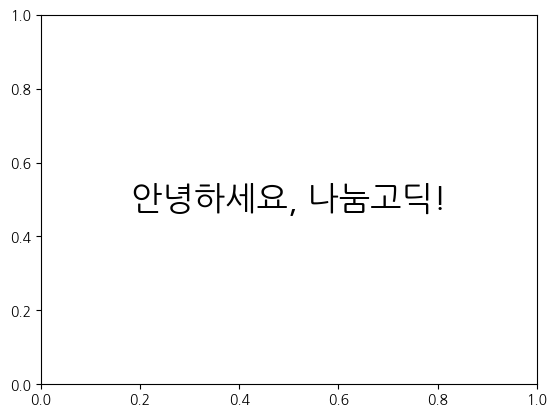

In [ ]:
##########################################
### 한글이 깨지는 경우 아래 코드 실행하기 !!!###
##########################################
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔고딕 폰트를 설치합니다.
!apt-get install -y fonts-nanum
!fc-cache -fv

# 설치된 나눔고딕 폰트를 matplotlib에 등록합니다.
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'NanumGothic'

# 폰트가 잘 설정되었는지 테스트합니다.
plt.text(0.5, 0.5, '안녕하세요, 나눔고딕!', ha='center', va='center', size=24)
plt.show()

# 1. 서울 내의 어느 정류장에 광역버스가 집중되는가


# 1-1. 데이터 전처리 및 분석_4팀_남선우

## 분석 주제 정의

광역버스의 집중이 극단화된 곳이 서울 도심과 **강남역**으로, 이로 인해 주변 도로에서 정체가 발생해 문제라는 기사를 읽었다.  
(https://mediahub.seoul.go.kr/archives/2011154)

이 기사에서는 광역버스가 집중되는 정류장에 광역환승센터를 건설해 주변 도로 정체를 해결할 수 있다고 말하고 있다.

따라서 광역버스들이 실제로 서울의 어느 정류장 주변에 집중되는지 데이터를 통해 파악해보고 싶었다.

만약 어떤 한 정류장 주변으로 광역버스가 많이 집중된다면,  
그 정류장 위치에 광역환승센터를 건설하는 것이 주변 도로 정체 완화에 도움이 될 수 있으므로 다음과 같은 분석을 진행하였다.

* 분석 주제: 서울 내의 어느 정류장에 광역버스가 집중되는가
* 분석 목표: 광역버스가 많이 집중되는 서울 내의 정류장을 찾아 주변 도로 정체 완화를 위해 해당 정류장 위치에 광역환승센터 건설을 제안

처음에는 분석 주제를 '광역버스로 인한 **강남역** 주변 혼잡 해결'로 설정했기 때문에 강남역 주변의 정류장들 중 광역버스가 집중되는 정류장을 찾아보려 했다.

따라서 교통카드 빅데이터 시스템(`https://stcis.go.kr/wps/main.do`)에서 **서울특별시 강남구**를 지나는 **광역버스** 노선만 필터링해 노선별 혼잡도 데이터를 추출하였다.

## 데이터 설명

### 데이터 출처

* 데이터 출처: 교통카드 빅데이터 시스템(`https://stcis.go.kr/wps/main.do`)에서 제공하는 노선별 혼잡도 데이터
* 원하는 데이터 수집 날짜를 선택할 수 있고, 전국에서 원하는 지역의 노선을 검색해 분석하고자 하는 노선만 선택해 데이터를 추출할 수 있다.
* 오픈 데이터로, 원하는 노선에 대해 혼잡도 데이터를 csv 파일로 다운로드할 수 있다.

### 데이터 설명

[데이터셋 크기와 데이터 수집 날짜]

1. 처음 분석을 진행할 때 사용한 'congestion_by_route.csv'

* 행의 개수: 7978, 열의 개수: 29
* 데이터 수집 날짜는 어떤 날짜로 수집해도 괜찮다고 판단해, 사이트에 들어가면 default로 되어 있는 가장 최근 수집된 날짜로 수집하였다.
* 서울특별시 강남구를 지나는 광역버스 노선만 필터링해 추출하였다.

2. 조건을 다르게 해 다시 수집한 'congestion_by_route_new_ver.csv'

* 행의 개수: 24882, 열의 개수: 29
* 데이터 수집 날짜: 2024-08-12(월)
* 서울특별시의 모든 광역버스 노선을 추출하였다.

[데이터의 변수 설명]

* `노선`: 해당 노선의 버스 번호가 문자열로 들어가 있다.
* `기종점`: 해당 노선의 기점과 종점의 정보가 '(기점) - (종점)' 형태의 문자열로 들어가 있다. 광역버스 노선은 회차하는 경우가 많아 기점과 종점이 같은 경우가 많다.
* `정류장순번`: 해당 노선의 정류장 순서대로 번호가 0부터 정수로 매겨져 있다.
* `정류장명`: 해당 노선의 정류장순번에 해당하는 정류장명이 문자열로 들어가 있다.
* `04시`, `05시`, ..., `03시`: 데이터 수집 날짜에서 해당 노선이 정류장을 지난 후의 버스 안 승객 수에 대한 혼잡도가 각 시간별로 정수로 들어가 있다.

아래는 데이터 내 혼잡도 값에 대한 설명이다.

<img src = "https://stcis.go.kr/images/prod/guide03_05.png">

## 노선별 혼잡도 데이터를 불러와 데이터프레임으로 저장

In [ ]:
import pandas as pd

In [ ]:
congestion_df = pd.read_csv('/content/drive/MyDrive/코드잇DA2기/EDA 프로젝트(4팀)/congestion_by_route.csv', encoding='cp949')

## EDA

In [ ]:
congestion_df.shape

(7978, 29)

In [ ]:
congestion_df.head()

,노선,기종점,정류장순번,정류장명,04시,05시,06시,07시,08시,09시,...,19시,20시,21시,22시,23시,00시,01시,02시,03시,Unnamed: 28
0,1007,수원대학교 - 수원대학교,0,수원대학교,4,2,2,4,2,0,...,2,0,2,0,0,0,0,0,0,NaN
1,1007,수원대학교 - 수원대학교,1,와우지구,2,4,4,15,9,2,...,4,0,0,0,0,0,0,0,0,NaN
2,1007,수원대학교 - 수원대학교,2,와우농협앞,7,0,9,22,9,0,...,0,0,0,0,0,0,0,0,0,NaN
3,1007,수원대학교 - 수원대학교,3,신일해피트리1차,9,2,11,24,16,2,...,7,2,0,0,0,0,0,0,0,NaN
4,1007,수원대학교 - 수원대학교,4,우림그린빌리지,11,0,13,29,20,4,...,0,0,0,0,0,0,0,0,0,NaN


NaN 값만 보이는 'Unnamed: 28'라는 이름의 열이 보인다.

In [ ]:
congestion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7978 entries, 0 to 7977
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   노선           7978 non-null   object 
 1   기종점          7978 non-null   object 
 2   정류장순번        7978 non-null   int64  
 3   정류장명         7978 non-null   object 
 4   04시          7978 non-null   int64  
 5   05시          7978 non-null   int64  
 6   06시          7978 non-null   int64  
 7   07시          7978 non-null   int64  
 8   08시          7978 non-null   int64  
 9   09시          7978 non-null   int64  
 10  10시          7978 non-null   int64  
 11  11시          7978 non-null   int64  
 12  12시          7978 non-null   int64  
 13  13시          7978 non-null   int64  
 14  14시          7978 non-null   int64  
 15  15시          7978 non-null   int64  
 16  16시          7978 non-null   int64  
 17  17시          7978 non-null   int64  
 18  18시          7978 non-null   int64  
 19  19시   

'Unnamed: 28'이라는 열은 모두 null값으로 이루어진 것을 알 수 있다.

해당 열을 제외한 나머지 열들은 결측치 없이 정상적으로 값이 들어가 있는 것을 알 수 있다.

따라서 'Unnamed: 28'이라는 의미 없는 열만 삭제해줄 것이다.

## NaN 값으로만 이루어진 'Unnamed: 28' 열 삭제

In [ ]:
congestion_df.drop('Unnamed: 28', axis = 1, inplace = True)

In [ ]:
congestion_df.shape

(7978, 28)

## 기초통계량 확인

In [ ]:
congestion_df.describe(include = 'all')

,노선,기종점,정류장순번,정류장명,04시,05시,06시,07시,08시,09시,...,18시,19시,20시,21시,22시,23시,00시,01시,02시,03시
count,7978,7978,7978.000000,7978,7978.000000,7978.000000,7978.000000,7978.000000,7978.000000,7978.000000,...,7978.000000,7978.000000,7978.000000,7978.000000,7978.000000,7978.000000,7978.000000,7978.000000,7978.000000,7978.000000
unique,109,83,NaN,2202,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2000,명지대 - 명지대,NaN,청계산입구역(경유),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,168,680,NaN,72,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,44.087491,NaN,0.429932,5.526824,12.792429,19.265981,16.521434,11.566057,...,21.497869,16.549260,13.607546,13.441339,14.791928,10.990223,5.639007,1.565179,0.391828,0.042617
std,NaN,NaN,32.140875,NaN,4.041860,14.496146,21.393635,27.125858,24.528020,19.680829,...,28.284281,24.623409,21.159116,22.666345,26.348421,19.956513,12.254613,6.897671,3.267812,1.058376
min,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,39.000000,NaN,0.000000,0.000000,0.000000,4.000000,4.000000,0.000000,...,9.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,64.000000,NaN,0.000000,0.000000,18.000000,30.000000,24.000000,15.000000,...,36.000000,24.000000,20.000000,17.000000,18.000000,13.000000,2.000000,0.000000,0.000000,0.000000


수행할 분석에 있어서는 기초통계량에서 도움이 될 만한 정보를 찾지 못했지만, 데이터에 대한 대략적인 파악이 가능했다.

## 앞 정류장과 뒤 정류장의 혼잡도 차이를 계산해 새로운 데이터프레임에 저장하기

광역버스가 집중되어 도로 정체가 심한 서울의 정류장을 찾기 위해, 어느 정류장에서 광역버스의 많은 하차가 일어나는지 노선별 혼잡도 데이터를 통해 파악해볼 것이다.

하차가 가장 많이 일어나는 정류장을 찾기 위해 노선들에서 **혼잡도가 줄어드는 양이 공통적으로 큰** 정류장을 찾아야 한다.

이를 위해 시간별로 '뒤 정류장' 혼잡도에서 '앞 정류장' 혼잡도 값을 뺀 후, '뒤 정류장'에 해당 값을 부여하는 새로운 열을 만들어 새로운 데이터프레임에 저장했다.

In [ ]:
congestion_df['04시 혼잡도 차이'] = congestion_df['04시'] - congestion_df['04시'].shift(1)

In [ ]:
congestion_df[['정류장명', '04시', '04시 혼잡도 차이']].head(10)

,정류장명,04시,04시 혼잡도 차이
0,수원대학교,4,NaN
1,와우지구,2,-2.0
2,와우농협앞,7,5.0
3,신일해피트리1차,9,2.0
4,우림그린빌리지,11,2.0
5,광도와이드빌,13,2.0
6,화성시민캠퍼스,13,0.0
7,수영리검사소,13,0.0
8,국립축산과학원,13,0.0
9,수영오거리.방송통신대입구,0,-13.0


shift 함수를 이용해 '04시' 열에 대해 혼잡도 차이 계산이 잘 되었으므로, 이를 모든 시간대에 적용하기 위해 for문을 이용했다.

In [ ]:
congestion_df = pd.read_csv('/content/drive/MyDrive/코드잇DA2기/EDA 프로젝트(4팀)/congestion_by_route.csv', encoding='cp949')
congestion_df.drop('Unnamed: 28', axis = 1, inplace = True)

In [ ]:
congestion_df.columns[4:]

Index(['04시', '05시', '06시', '07시', '08시', '09시', '10시', '11시', '12시', '13시',
       '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시',
       '00시', '01시', '02시', '03시'],
      dtype='object')

In [ ]:
congestion2_df = congestion_df.iloc[:, 0:4].copy()

In [ ]:
for i in congestion_df.columns[4:]:
    congestion2_df['{} 혼잡도 차이'.format(i)] = congestion_df[i] - congestion_df[i].shift(1)

## 정리(데이터 불러오기 ~ 혼잡도 차이에 대한 새로운 데이터프레임 생성)

In [ ]:
import pandas as pd
pd.set_option('display.max_rows', 100)

In [ ]:
# 노선별 혼잡도 원본 데이터 불러오기
congestion_df = pd.read_csv('/content/drive/MyDrive/코드잇DA2기/EDA 프로젝트(4팀)/congestion_by_route.csv', encoding='cp949')

# NaN 값으로만 이루어진 'Unnamed: 28' 열 삭제
congestion_df.drop('Unnamed: 28', axis = 1, inplace = True)

# 시간별 혼잡도 열이 나오기 전의 열들을 복사해 새 데이터프레임 생성
congestion2_df = congestion_df.iloc[:, 0:4].copy()

# 앞 정류장과 뒤 정류장의 혼잡도 차이 계산해 열로 만들기
for i in congestion_df.columns[4:]:
    congestion2_df['{} 혼잡도 차이'.format(i)] = congestion_df[i] - congestion_df[i].shift(1)

congestion2_df

,노선,기종점,정류장순번,정류장명,04시 혼잡도 차이,05시 혼잡도 차이,06시 혼잡도 차이,07시 혼잡도 차이,08시 혼잡도 차이,09시 혼잡도 차이,...,18시 혼잡도 차이,19시 혼잡도 차이,20시 혼잡도 차이,21시 혼잡도 차이,22시 혼잡도 차이,23시 혼잡도 차이,00시 혼잡도 차이,01시 혼잡도 차이,02시 혼잡도 차이,03시 혼잡도 차이
0,1007,수원대학교 - 수원대학교,0,수원대학교,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1007,수원대학교 - 수원대학교,1,와우지구,-2.0,2.0,2.0,11.0,7.0,2.0,...,2.0,2.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1007,수원대학교 - 수원대학교,2,와우농협앞,5.0,-4.0,5.0,7.0,0.0,-2.0,...,2.0,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1007,수원대학교 - 수원대학교,3,신일해피트리1차,2.0,2.0,2.0,2.0,7.0,2.0,...,-4.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1007,수원대학교 - 수원대학교,4,우림그린빌리지,2.0,-2.0,2.0,5.0,4.0,2.0,...,-5.0,-7.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7973,이음2,양곡터미널(경유) - 구래역,69,장기역.신영아파트,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7974,이음2,양곡터미널(경유) - 구래역,70,뉴고려병원.이니스더원,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0
7975,이음2,양곡터미널(경유) - 구래역,71,마산역,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7976,이음2,양곡터미널(경유) - 구래역,72,힐스테이트.경남아너스빌,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0


## 공통적으로 버스 내의 혼잡도가 급격히 떨어지는 정류장 추출하기

### EDA

In [ ]:
congestion2_df.shape

(7978, 28)

In [ ]:
congestion2_df['정류장명'].nunique()

2202

각 노선들에 대해 기점(경기)-종점(서울)-기점(경기)까지의 모든 정류장들이 정류장명에 쭉 나열되어 있기 때문에  
같은 노선 내에서도 정류장이 중복되기도 하고, 여러 노선들이 같은 정류장을 지난다면 중복되기도 한다.

같은 정류장이라면 각 노선에서 계산된 혼잡도 차이의 합에 대해 묶어서 다시 한 번 합해주어야 한다.

이를 위해 groupby를 사용할 것이고, 이를 통해 많은 노선들이 지나는 정류장에 대한 설명도 들어가게 되어 해당 정류장에서 혼잡이 일어나는지 파악하는 분석 목적과 잘 맞게 된다.

### 전체 시간대의 혼잡도를 sum

In [ ]:
congestion3_df = congestion2_df.copy()

In [ ]:
congestion3_df['혼잡도 합'] = congestion3_df.iloc[:, 4:].sum(axis = 1)

In [ ]:
congestion3_df[['정류장명', '혼잡도 합']].sort_values(by = '혼잡도 합').head(30)

,정류장명,혼잡도 합
6314,한강대교(가상),-1124.0
6347,성산대교남단(가상),-1022.0
5922,장곡.고촌고등학교,-830.0
2673,섬마을,-662.0
3494,어정삼거리.강남마을,-634.0
3830,고속철도수서역,-627.0
3802,등자리,-552.0
3429,역말마을,-535.0
2034,직동삼거리.광남화물,-523.0
650,율동공원라폴리움,-521.0


같은 정류장(ex. 순천향대학병원)이지만 버스(노선)가 달라 다른 행에 표시된다.

이를 groupby로 합쳐주어야 한다.

In [ ]:
congestion4_df = congestion3_df[['정류장명', '혼잡도 합']]

In [ ]:
congestion4_df.groupby('정류장명').sum().sort_values(by = '혼잡도 합').head(70)

,혼잡도 합
정류장명,
순천향대학병원,-5403.0
국가인권위.안중근활동터(중),-3183.0
등자리,-2298.0
남대문세무서.국가인권위원회,-1957.0
서울시청,-1789.0
토평IC,-1674.0
교육개발원입구(중),-1529.0
잠실리센츠아파트앞,-1527.0
잠실트리지움아파트앞,-1473.0


강남역 정류장으로는 ‘강남역서초현대타워앞’ 정류장이 가장 상위에 있다.  
하지만 전체적으로 봤을 때 해당 정류장이 상위에 위치해 있다고 말하기는 어렵다.

#### 발견한 문제점 #1

- '강남역서초현대타워앞' 위쪽으로 서울 내의 정류장이 아닌데 (-)값이 크게 나오는 정류장들이 많이 있다. (ex. 경기남부경찰청.봉녕사입구)
- 원인을 생각해본 결과, 정류장별로 **모든 시간대**의 혼잡도를 sum해 계산했기 때문에 퇴근할 때 많이 내리는 경기권 정류장들도 상위에 포함이 된 것으로 추측된다.
- 이를 해결하기 위해서는 모든 시간대의 혼잡도를 sum하지 않고, **출근 시간대**의 혼잡도만 sum하는 것이 필요할 것이다.

### 출근 시간대의 혼잡도만 sum해서 다시 조사

In [ ]:
congestion3_df = congestion2_df.copy()
congestion3_df['혼잡도 합'] = congestion3_df.iloc[:, 4:9].sum(axis = 1) # 오전 4시 ~ 오전 8시 혼잡도에 대해서만 sum
congestion4_df = congestion3_df[['정류장명', '혼잡도 합']]
congestion4_df.groupby('정류장명').sum().sort_values(by = '혼잡도 합').head(70)

,혼잡도 합
정류장명,
국가인권위.안중근활동터(중),-1225.0
순천향대학병원,-891.0
남대문세무서.국가인권위원회,-725.0
잠실리센츠아파트앞,-713.0
서울시청,-711.0
삼평교,-524.0
삼성서초역삼세무서,-487.0
등자리,-470.0
신한은행본점,-439.0


시간대를 출근 시간대로 한정해 sum하니 상위에 있는 대부분의 정류장들이 서울 내의 정류장이거나 판교 쪽 정류장이다.

강남역 정류장으로는  

1. 신분당선강남역(중): -298
2. 강남역도시에빛: -187
3. 강남역서초현대타워앞: -142  

순으로 순위를 이루었다.

신분당선강남역(중) 정류장이 상위로 올라오긴 했지만 최상위권이라고 말하기는 어렵다.

#### 발견한 문제점 #2

- 현재 혼잡도 자료가 어떤 날짜의 자료인지에 대한 확인 없이 추출했다.
- 따라서 어느 요일의 혼잡도 자료인지 알 수 없는데, 만일 주말의 혼잡도 자료라면 출근 시간의 혼잡도라고 보기는 애매하다.
- 따라서 평일 혼잡도 자료로 다시 추출해 결과를 내보고 싶다.
- 기사를 찾아본 결과 **월요일**에 서울 내 출근 시간 교통 체증이 가장 심하다는 기사가 여럿 있었다.
- 평일 중 어느 요일로 분석해도 큰 상관은 없지만, 출근 시간대의 버스 내의 혼잡도가 가장 높을 것이라 예상되는 **월요일** 혼잡도 자료로 다시 결과를 내보고 싶다.

#### 발견한 문제점 #3

* 처음에 데이터를 추출할 때 강남역 주변의 정류장들 중 광역버스가 집중되는 정류장을 찾아보려 해서 **서울특별시 강남구**를 지나는 **광역버스** 노선만 필터링해 노선별 혼잡도 데이터를 추출하였다.
* 그러나 위에 결과로 나온 데이터프레임을 보면 '국가인권위.안중근활동터(중)', '순천향대학병원' 등의 정류장이 모두 강남구 안의 정류장들이 아니다.
* 이는 강남구를 지나는 광역버스 노선들로 필터링해 추출했지만 그 노선들의 정류장들이 모두 강남구에 있는 것이 아니기 때문에 지극히 당연한 결과이다.
* 즉 원하는 결과로 이어질 수 없는 필터링을 진행했기 때문에 필터링이 의미가 없는 행위였고, 서울의 특정 지역(강남구)을 지나는 노선들로만 필터링한 데이터로 조사를 하였기 때문에 샘플링에 있어 **편향된 샘플링이 이루어진 것이다.**
* 따라서 강남구를 지나는 광역버스 노선들로 특정하지 않고 서울의 모든 광역버스 노선들로 노선별 혼잡도 데이터를 추출해 다시 조사해볼 필요가 있다.

## '2024-08-12(월), 서울의 모든 광역버스 노선'으로 이루어진 노선별 혼잡도 자료로 처음부터 다시 조사

In [ ]:
# 노선별 혼잡도 원본 데이터 불러오기
new_congestion_df = pd.read_csv('/content/drive/MyDrive/코드잇DA2기/EDA 프로젝트(4팀)/congestion_by_route_new_ver.csv', encoding='cp949')

# NaN 값으로만 이루어진 'Unnamed: 28' 열 삭제
new_congestion_df.drop('Unnamed: 28', axis = 1, inplace = True)

# 시간별 혼잡도 열이 나오기 전의 열들을 복사해 새 데이터프레임 생성
new_congestion2_df = new_congestion_df.iloc[:, 0:4].copy()

# 앞 정류장과 뒤 정류장의 혼잡도 차이 계산해 열로 만들기
for i in new_congestion_df.columns[4:]:
    new_congestion2_df['{} 혼잡도 차이'.format(i)] = new_congestion_df[i] - new_congestion_df[i].shift(1)

new_congestion2_df

,노선,기종점,정류장순번,정류장명,04시 혼잡도 차이,05시 혼잡도 차이,06시 혼잡도 차이,07시 혼잡도 차이,08시 혼잡도 차이,09시 혼잡도 차이,...,18시 혼잡도 차이,19시 혼잡도 차이,20시 혼잡도 차이,21시 혼잡도 차이,22시 혼잡도 차이,23시 혼잡도 차이,00시 혼잡도 차이,01시 혼잡도 차이,02시 혼잡도 차이,03시 혼잡도 차이
0,7700,청라BRT차고지입구 - 청라BRT차고지입구,0,청라BRT차고지입구,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7700,청라BRT차고지입구 - 청라BRT차고지입구,1,로봇타워,0.0,0.0,0.0,2.0,5.0,0.0,...,2.0,4.0,4.0,4.0,0.0,-3.0,0.0,0.0,0.0,0.0
2,7700,청라BRT차고지입구 - 청라BRT차고지입구,2,로봇랜드입구,2.0,2.0,5.0,15.0,8.0,4.0,...,2.0,8.0,-7.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7700,청라BRT차고지입구 - 청라BRT차고지입구,3,청라호수공원한신더휴아파트,-2.0,7.0,8.0,7.0,10.0,9.0,...,7.0,2.0,9.0,5.0,7.0,5.0,0.0,0.0,0.0,0.0
4,7700,청라BRT차고지입구 - 청라BRT차고지입구,4,청라중앙호수공원입구,0.0,0.0,11.0,7.0,12.0,7.0,...,2.0,3.0,-4.0,7.0,0.0,-5.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24877,7101,팜스프링아파트 - 팜스프링아파트,64,후곡마을4단지,0.0,0.0,0.0,0.0,0.0,0.0,...,-12.0,-5.0,-2.0,-4.0,-5.0,-6.0,-4.0,-4.0,-4.0,0.0
24878,7101,팜스프링아파트 - 팜스프링아파트,65,흰돌아파트,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-2.0,-7.0,-5.0,-4.0,-7.0,-7.0,-2.0,0.0,0.0
24879,7101,팜스프링아파트 - 팜스프링아파트,66,장안아파트,0.0,0.0,0.0,0.0,0.0,0.0,...,-4.0,0.0,-2.0,-11.0,0.0,0.0,2.0,-7.0,0.0,0.0
24880,7101,팜스프링아파트 - 팜스프링아파트,67,금촌역,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-2.0,9.0,2.0,0.0,-2.0,4.0,0.0,0.0


In [ ]:
pd.set_option('display.max_rows', 100)

new_congestion3_df = new_congestion2_df.copy()
new_congestion3_df['혼잡도 합'] = new_congestion3_df.iloc[:, 4:9].sum(axis = 1) # 오전 4시 ~ 오전 8시 혼잡도에 대해서만 sum
new_congestion4_df = new_congestion3_df[['정류장명', '혼잡도 합']]
new_congestion4_df.groupby('정류장명').sum().sort_values(by = '혼잡도 합').head(70)

,혼잡도 합
정류장명,
잠실광역환승센터,-3617.0
사당역(중),-3394.0
신논현역.주류성빌딩,-1575.0
국가인권위.안중근활동터(중),-1465.0
신분당선강남역(중),-1416.0
순천향대학병원,-1386.0
사당역3번출구,-1292.0
KCC사옥,-1254.0
신한은행본점,-1152.0


편향되지 않게 샘플링된 월요일 노선별 혼잡도 자료로 출근 시간대의 혼잡도 차이 합을 계산해, 출근 시간대에 광역버스의 하차가 많이 이루어지는 서울 내의 정류장을 알아보았다.

잠실광역환승센터와 사당역이 1, 2위를 차지했으며, 사당역은 주변의 수많은 버스들과 이에 따른 버스정류장으로 인해 현재 복합환승센터 건설이 이루어지고 있다.  
(http://www.xn--2q1bv3l9zbk3e9qd.com/detail.php?number=4437&thread=22r03)

그 밑으로는 강남역 주변의 정류장들이 상위에 위치해 있다.

즉 강남역 주변에서 광역버스의 하차가 많이 일어나고 있고 이로 인해 도로 교통의 혼잡이 유발될 가능성이 높다.

따라서 추가적인 광역환승센터의 건설이 이루어질 수 있다면 **강남역**에 건설하는 것이 가장 적절할 것이다.

In [ ]:
new_congestion5_df = new_congestion4_df.groupby('정류장명').sum().sort_values(by = '혼잡도 합')

In [ ]:
new_congestion5_df

,혼잡도 합
정류장명,
잠실광역환승센터,-3617.0
사당역(중),-3394.0
신논현역.주류성빌딩,-1575.0
국가인권위.안중근활동터(중),-1465.0
신분당선강남역(중),-1416.0
...,...
텃골.중대동,564.0
삼송역사거리(중),579.0
남산1호터널TG(경유),580.0


In [ ]:
new_congestion5_df.to_csv('congestion_by_route_analysis_result.csv', encoding='cp949')

# 1-2. 데이터 전처리 및 시각화_4팀_김명균

In [ ]:
result_path = '/content/drive/MyDrive/코드잇DA2기/EDA 프로젝트(4팀)/congestion_by_route_analysis_result.csv'
new_congestion5_df = pd.read_csv(result_path, encoding='cp949')

In [ ]:
new_congestion5_df

,정류장명,혼잡도 합
0,잠실광역환승센터,-3617.0
1,사당역(중),-3394.0
2,신논현역.주류성빌딩,-1575.0
3,국가인권위.안중근활동터(중),-1465.0
4,신분당선강남역(중),-1416.0
...,...,...
5225,텃골.중대동,564.0
5226,삼송역사거리(중),579.0
5227,남산1호터널TG(경유),580.0
5228,LG빌리지5차,608.0


## 각 정류장에 정차하는 광역버스의 수 알아보기
- "정류장명" 컬럼에는 광역버스가 지나가는 정류장들을 담고있다.
- 다만, 정류장명에 (경유)가 포함되는 경우는 정차를 하지 않기 때문에 해당 데이터들은 정류장에 정차하는 광역버스의 갯 수를 파악하기엔 의미가 없으므로 삭제처리하였다.

In [ ]:
new_congestion_df.head()

,노선,기종점,정류장순번,정류장명,04시,05시,06시,07시,08시,09시,...,18시,19시,20시,21시,22시,23시,00시,01시,02시,03시
0,7700,청라BRT차고지입구 - 청라BRT차고지입구,0,청라BRT차고지입구,0,0,0,0,0,0,...,7,0,3,0,0,3,0,0,0,0
1,7700,청라BRT차고지입구 - 청라BRT차고지입구,1,로봇타워,0,0,0,2,5,0,...,9,4,7,4,0,0,0,0,0,0
2,7700,청라BRT차고지입구 - 청라BRT차고지입구,2,로봇랜드입구,2,2,5,17,13,4,...,11,12,0,2,0,0,0,0,0,0
3,7700,청라BRT차고지입구 - 청라BRT차고지입구,3,청라호수공원한신더휴아파트,0,9,13,24,23,13,...,18,14,9,7,7,5,0,0,0,0
4,7700,청라BRT차고지입구 - 청라BRT차고지입구,4,청라중앙호수공원입구,0,9,24,31,35,20,...,20,17,5,14,7,0,0,0,0,0


In [ ]:
# 정차하는 광역버스의 수만 계산할 것으로 '노선'과 '정류장명'컬럼만 필요함
route = new_congestion_df[['노선', '정류장명']]

In [ ]:
route_filtered = route[~route['정류장명'].str.contains(r'\(경유\)', case=False, na=False)] #'정류장명' (경유)라는 단어가 포함된 행을 제거

stop_route_counts = route_filtered.groupby('정류장명')['노선'].nunique().reset_index()
stop_route_counts.columns = ['정류장명', '정차하는 버스 수']

stop_route_counts_sorted = stop_route_counts.sort_values(by='정차하는 버스 수', ascending=False)

In [ ]:
stop_route_counts_sorted.head(10)

,정류장명,정차하는 버스 수
1366,매헌시민의숲.양재꽃시장,82
2838,양재역.서초문화예술회관(중),60
1638,뱅뱅사거리(중),57
2618,신분당선강남역(중),48
1256,래미안아파트.파이낸셜뉴스(중),46
465,교육개발원입구(중),44
3490,잠실광역환승센터,41
2496,숭례문,37
2710,신한은행본점,36
25,KCC사옥,36


## 정류장 위치 데이터 전처리
- 사용한 버스정류장 위치 데이터
> [국토교통부_전국 버스정류장 위치정보](https://www.data.go.kr/data/15067528/fileData.do)

버스정류장은 상행과 하행으로 동일한 이름을 가진 정류장이 존재할 수 있다.

현재 분석에 사용한 내부혼잡도 데이터 파일에는 상행인지 하행인지 구분이 되어있지않다.
- 정류장번호나 ID가 처음부터 데이터셋에 같이 존재하지가 않았음


In [ ]:
location_path = '/content/drive/MyDrive/코드잇DA2기/EDA 프로젝트(4팀)/국토교통부_전국 버스정류장 위치정보_20231016.csv'
bus_stop_location = pd.read_csv(location_path, encoding='cp949')

In [ ]:
bus_stop_location.head()

,정류장번호,정류장명,위도,경도,정보수집일,모바일단축번호,도시코드,도시명,관리도시명
0,ADB354000076,신덕1리,36.524325,128.830926,2023-10-16,540076.0,37040,경상북도 안동시,안동
1,ADB354000077,나천,36.484444,128.876390,2023-10-16,540077.0,37040,경상북도 안동시,안동
2,ADB354000078,골삽실,36.462248,128.887606,2023-10-16,540078.0,37040,경상북도 안동시,안동
3,ADB354000079,금곡(길안),36.394360,128.933281,2023-10-16,540079.0,37040,경상북도 안동시,안동
4,ADB354000080,대사.토일,36.368580,128.940353,2023-10-16,540080.0,37040,경상북도 안동시,안동


In [ ]:
bus_stop_location['정류장명'].duplicated().sum()

114310

중복된 이름을 가지는 정류장명이 많았다.

먼저, 혼잡도 데이터에 존재하는 정류장들의 위치 데이터가 존재하는지 확인

In [ ]:
# 위치데이터에서 혼잡도 데이터에 존재하는 중복된 정류장명을 가진 데이터 추출
duplicate = bus_stop_location[bus_stop_location.duplicated(subset='정류장명', keep='first')]

duplicate_stops = new_congestion5_df[new_congestion5_df['정류장명'].isin(duplicate['정류장명'])]['정류장명'].unique()
duplicate_stops = pd.DataFrame(duplicate_stops, columns=['정류장명'])

In [ ]:
duplicate_stops

,정류장명
0,사당역(중)
1,신분당선강남역(중)
2,순천향대학병원
3,토평IC
4,삼평교
...,...
3094,내동마을.한신아파트
3095,서수지IC입구
3096,텃골.중대동
3097,남산1호터널TG(경유)


In [ ]:
# 위치데이터에서 혼잡도 데이터에 존재하는 중복되지 않은 정류장명을 가진 데이터 추출
non_duplicate = bus_stop_location[~bus_stop_location.duplicated(subset='정류장명', keep=False)]

matching_stops = new_congestion5_df[new_congestion5_df['정류장명'].isin(non_duplicate['정류장명'])]
matching_stops = pd.DataFrame(matching_stops, columns=['정류장명'])

In [ ]:
matching_stops

,정류장명
0,잠실광역환승센터
2,신논현역.주류성빌딩
6,사당역3번출구
7,KCC사옥
8,신한은행본점
...,...
5209,한신.세아.현대아파트
5210,호수자이파밀리에.아이원
5214,사당역4번출구
5220,삼익아파트.광교산입구


In [ ]:
총_데이터 = new_congestion5_df['정류장명'].count()
식별된_위치_데이터 = duplicate_stops['정류장명'].count() + matching_stops['정류장명'].count()

print(f"식별되지않은 위치 데이터의 갯수: {총_데이터 - 식별된_위치_데이터}개")

식별되지않은 위치 데이터의 갯수: 304개


- 5230개중 중복된 정류장명(상행, 하행)을 가진 데이터는 3099개 존재함

- 5230개중 중복되지않은 정류장명을 가진 데이터는 1827개 존재함

- 나머지는 가지고있는 위치 데이터에 식별되지않은 데이터임 -> 304개

중복된 정류장명을 가진 일부 데이터들을 검색으로 직접 확인


- 판단 : 대부분 운행 정류장의 상행,하행의 이름이 같을 경우 지리적으로 큰 차이가 존재하지않으므로 중복값을 제거하기로함 (ex.길건너 맞은편에 존재)

In [ ]:
# 중복되는값은 하나만 제외하고 모두 버림
no_duplicates_location = bus_stop_location.drop_duplicates(subset='정류장명', keep='first')

In [ ]:
no_duplicates_location['정류장명'].value_counts()

,count
정류장명,
신덕1리,1
동수동[북],1
동상효[서],1
칡오름[서],1
칡오름[동],1
...,...
래미안개포루체하임아파트,1
고속철도수서역,1
강남더샵라르고오피스텔,1


#### 각 정류장의 위치 데이터 Merge

In [ ]:
merged_df = pd.merge(new_congestion5_df, no_duplicates_location, left_on='정류장명', right_on='정류장명', how='left')

result_df = merged_df[['정류장명', '위도', '경도', '혼잡도 합']]

In [ ]:
result_df

,정류장명,위도,경도,혼잡도 합
0,잠실광역환승센터,37.512350,127.100667,-3617.0
1,사당역(중),37.474717,126.981733,-3394.0
2,신논현역.주류성빌딩,37.501150,127.025767,-1575.0
3,국가인권위.안중근활동터(중),NaN,NaN,-1465.0
4,신분당선강남역(중),37.495783,127.028567,-1416.0
...,...,...,...,...
5225,텃골.중대동,37.406250,127.211567,564.0
5226,삼송역사거리(중),NaN,NaN,579.0
5227,남산1호터널TG(경유),37.555700,126.992717,580.0
5228,LG빌리지5차,37.324767,127.073417,608.0


In [ ]:
result_df.isnull().sum()

,0
정류장명,0
위도,304
경도,304
혼잡도 합,0


위의 계산대로 식별되지않은 정류장 304곳이 발견됨

In [ ]:
# Null값만 추출
null_data = result_df[result_df.isna().any(axis=1)]

In [ ]:
null_data

,정류장명,위도,경도,혼잡도 합
3,국가인권위.안중근활동터(중),NaN,NaN,-1465.0
14,당산역2번출구,NaN,NaN,-835.0
35,삼송주택앞(중),NaN,NaN,-451.0
49,성남역.백현마을2단지,NaN,NaN,-390.0
73,동작대로(가상),NaN,NaN,-335.0
...,...,...,...,...
5162,옥정3단지.3차디에트르,NaN,NaN,279.0
5192,장곡삼거리,NaN,NaN,338.0
5198,남대문세무서(중),NaN,NaN,381.0
5226,삼송역사거리(중),NaN,NaN,579.0


In [ ]:
null_data = null_data.drop(columns=['위도', '경도'])

### 위치 데이터 추가 수집
기존 위치 데이터에 존재하지 않는 정류장명이 존재하니, 최신 위치 데이터를 수집한다.


- [서울시 버스정류소 위치정보](https://data.seoul.go.kr/dataList/OA-15067/S/1/datasetView.do)

기존 데이터도 2023년도 10월자이지만

정류장명이 변경되거나 신설되었거나의 이유로 식별되지 않았을 수 있다고 생각했다.

In [ ]:
another_location_path = '/content/drive/MyDrive/코드잇DA2기/EDA 프로젝트(4팀)/서울시버스정류소위치정보(20240903).xlsx'
another_location = pd.read_excel(another_location_path)

In [ ]:
another_location.head()

,NODE_ID,ARS_ID,정류소명,X좌표,Y좌표,정류소타입
0,100000001,1001,종로2가사거리,126.987752,37.569806,중앙차로
1,100000002,1002,창경궁.서울대학교병원,126.996521,37.579433,중앙차로
2,100000003,1003,명륜3가.성대입구,126.998251,37.582580,중앙차로
3,100000004,1004,종로2가.삼일교,126.987613,37.568579,중앙차로
4,100000005,1005,혜화동로터리.여운형활동터,127.001744,37.586243,중앙차로


기존 컬럼과 달라서 햇갈리니 동일한 형식으로 변경하는 과정

In [ ]:
# 컬럼명 변경
another_location = another_location.rename(columns={'정류소명':'정류장명','X좌표':'경도', 'Y좌표':'위도'})

# 컬럼 순서 재정렬
another_location = another_location[['정류장명', '위도', '경도']]

In [ ]:
another_location

,정류장명,위도,경도
0,종로2가사거리,37.569806,126.987752
1,창경궁.서울대학교병원,37.579433,126.996521
2,명륜3가.성대입구,37.582580,126.998251
3,종로2가.삼일교,37.568579,126.987613
4,혜화동로터리.여운형활동터,37.586243,127.001744
...,...,...,...
11262,우성아파트,37.550386,127.139339
11263,우성아파트,37.550643,127.140046
11264,라움포레아파트,37.533630,127.123596
11265,성내시장,37.536155,127.125497


동일한 정류장명이 존재할 경우를 대비해 미리 중복값 체크

In [ ]:
pd.DataFrame(another_location['정류장명'].value_counts())

,count
정류장명,
새마을금고,12
벽산아파트,12
현대아파트,10
삼성래미안아파트,9
성원아파트,9
...,...
정원여중.스위스그랜드호텔,1
정원여중,1
서대문구보건소별관,1


또 중복값이 있으므로 이것도 삭제 진행

In [ ]:
another_location = another_location.drop_duplicates(subset='정류장명', keep='first')

In [ ]:
pd.DataFrame(another_location['정류장명'].value_counts())

,count
정류장명,
종로2가사거리,1
대륭테크노타운,1
독산주공1319동,1
금천현대아파트,1
홈플러스.문일중고입구,1
...,...
쌍문1동주민센터,1
오복슈퍼,1
믿음주유소,1


In [ ]:
merge2 = pd.merge(null_data,another_location, left_on='정류장명', right_on='정류장명', how='left')

null_data2 = merge2[['정류장명', '위도', '경도', '혼잡도 합']]

In [ ]:
null_data2

,정류장명,위도,경도,혼잡도 합
0,국가인권위.안중근활동터(중),NaN,NaN,-1465.0
1,당산역2번출구,37.534863,126.90241,-835.0
2,삼송주택앞(중),NaN,NaN,-451.0
3,성남역.백현마을2단지,NaN,NaN,-390.0
4,동작대로(가상),37.515909,126.98296,-335.0
...,...,...,...,...
299,옥정3단지.3차디에트르,NaN,NaN,279.0
300,장곡삼거리,NaN,NaN,338.0
301,남대문세무서(중),NaN,NaN,381.0
302,삼송역사거리(중),NaN,NaN,579.0


In [ ]:
null_data2.isnull().sum()

,0
정류장명,0
위도,222
경도,222
혼잡도 합,0


아직도 결측값이 존재한다. 왜째서..?
-  엑셀로 데이터를 봐봄

#### 발견한 문제점 #1
혼잡도 데이터에 존재하는 정류장명은 "국가인권위.안중근활동터(중)" 이지만 위치 데이터에는 "국가인권위.안중근활동터"로 되어있다..

In [ ]:
null_data2[null_data2['정류장명'] == '국가인권위.안중근활동터(중)']

,정류장명,위도,경도,혼잡도 합
0,국가인권위.안중근활동터(중),NaN,NaN,-1465.0


In [ ]:
another_location[another_location['정류장명'] == '국가인권위.안중근활동터']

,정류장명,위도,경도
391,국가인권위.안중근활동터,37.56435,126.987852


하위 문자열이 일치하는 경우 위, 경도 데이터를 반환하도록 해보자

In [ ]:
null_data2.drop(columns=['위도', '경도'])

,정류장명,혼잡도 합
0,국가인권위.안중근활동터(중),-1465.0
1,당산역2번출구,-835.0
2,삼송주택앞(중),-451.0
3,성남역.백현마을2단지,-390.0
4,동작대로(가상),-335.0
...,...,...
299,옥정3단지.3차디에트르,279.0
300,장곡삼거리,338.0
301,남대문세무서(중),381.0
302,삼송역사거리(중),579.0


In [ ]:
def find_location_data(row, another_location):
    # row에서 '정류장명'과 another_location의 '정류장명'이 일치하는 데이터를 찾음
    match = another_location[another_location['정류장명'].apply(lambda x: x in row['정류장명'])]

    # 만약 match가 비어있지 않으면 첫 번째 행의 '위도'와 '경도'를 반환
    # 비어있으면 NaN 값을 반환
    return pd.Series({'위도': match.iloc[0]['위도'], '경도': match.iloc[0]['경도']}) if not match.empty else pd.Series({'위도': float('nan'), '경도': float('nan')})

# null_data2 데이터프레임에 find_location_data 함수를 적용하여 '위도'와 '경도' 열을 추가함
null_data2[['위도', '경도']] = null_data2.apply(find_location_data, axis=1, another_location=another_location)

# '정류장명', '위도', '경도', '혼잡도 합' 열만 남긴 새로운 데이터프레임을 생성
null_data2 = null_data2[['정류장명', '위도', '경도', '혼잡도 합']]

In [ ]:
null_data2

,정류장명,위도,경도,혼잡도 합
0,국가인권위.안중근활동터(중),37.564350,126.987852,-1465.0
1,당산역2번출구,37.534729,126.900526,-835.0
2,삼송주택앞(중),NaN,NaN,-451.0
3,성남역.백현마을2단지,NaN,NaN,-390.0
4,동작대로(가상),37.515909,126.982960,-335.0
...,...,...,...,...
299,옥정3단지.3차디에트르,NaN,NaN,279.0
300,장곡삼거리,37.606027,126.930893,338.0
301,남대문세무서(중),37.564985,126.987530,381.0
302,삼송역사거리(중),37.496036,126.936794,579.0


In [ ]:
null_data2.value_counts().sum()

129

결측치가 상당 수 줄어든 걸 확인할 수 있었다.



결측치의 혼잡도를 보고 버릴 수 있는 데이터인지 판단해보자

In [ ]:
null_data3 = null_data2[null_data2.isna().any(axis=1)]

In [ ]:
null_data3.head(50)

,정류장명,위도,경도,혼잡도 합
2,삼송주택앞(중),NaN,NaN,-451.0
3,성남역.백현마을2단지,NaN,NaN,-390.0
5,북양1리.봉림사,NaN,NaN,-265.0
9,해월교.월곶풍림3차,NaN,NaN,-210.0
11,한경국립대.노인전문평택병원,NaN,NaN,-172.0
14,동국대학교사범부속.영석고등학교,NaN,NaN,-121.0
15,오야동.신촌동주민센터,NaN,NaN,-115.0
16,낙생육교,NaN,NaN,-107.0
17,경기도인재개발원.연구원.평생교육진흥원.여성가족재단,NaN,NaN,-104.0
18,시흥동주민센터,NaN,NaN,-102.0


결측값들을 보았을때 혼잡도의 합이 분석에 유의미한 결과를 가져오진 않을 것 같아 Drop하기로 결정

In [ ]:
null_data2.isnull().sum()

,0
정류장명,0
위도,175
경도,175
혼잡도 합,0


In [ ]:
# 결측값을 제외하고 추출
null_data2 = null_data2.dropna()

In [ ]:
null_data2.isnull().sum()

,0
정류장명,0
위도,0
경도,0
혼잡도 합,0


최종 결측값 업데이트 진행

In [ ]:
update_data2 = null_data2

In [ ]:
# 결측값 업데이트

# '정류장명' 열이 result_df와 update_data 모두에 존재하는지 확인
if '정류장명' in result_df.columns and '정류장명' in update_data2.columns:

    # '정류장명'을 인덱스로 설정하여 두 데이터프레임을 기준으로 병합 및 업데이트 준비
    result_df.set_index('정류장명', inplace=True)
    update_data2.set_index('정류장명', inplace=True)

    # result_df의 값을 update_data에 있는 값으로 업데이트
    result_df.update(update_data2)

    # 업데이트 후 다시 인덱스를 열로 리셋
    result_df.reset_index(inplace=True)


    # 업데이트 완료 메시지 출력
    print("데이터 업데이트 됨")
else:

    # '정류장명' 열이 하나라도 없으면 업데이트 실패 메시지 출력
    print("데이터 업데이트 실패")

데이터 업데이트 됨


In [ ]:
result_df.isnull().sum()

,0
정류장명,0
위도,175
경도,175
혼잡도 합,0


In [ ]:
result_df = result_df.dropna()

In [ ]:
result_df

,정류장명,위도,경도,혼잡도 합
0,잠실광역환승센터,37.512350,127.100667,-3617.0
1,사당역(중),37.474717,126.981733,-3394.0
2,신논현역.주류성빌딩,37.501150,127.025767,-1575.0
3,국가인권위.안중근활동터(중),37.564350,126.987852,-1465.0
4,신분당선강남역(중),37.495783,127.028567,-1416.0
...,...,...,...,...
5224,서수지IC입구,37.323317,127.057850,548.0
5225,텃골.중대동,37.406250,127.211567,564.0
5226,삼송역사거리(중),37.496036,126.936794,579.0
5227,남산1호터널TG(경유),37.555700,126.992717,580.0


In [ ]:
sampling = result_df.copy()

## 데이터 시각화 진행

### 정차하는 광역버스가 많은 정류장에 대한 시각화 진행

In [ ]:
stop_route_counts_sorted.head(10)

,정류장명,정차하는 버스 수
1366,매헌시민의숲.양재꽃시장,82
2838,양재역.서초문화예술회관(중),60
1638,뱅뱅사거리(중),57
2618,신분당선강남역(중),48
1256,래미안아파트.파이낸셜뉴스(중),46
465,교육개발원입구(중),44
3490,잠실광역환승센터,41
2496,숭례문,37
2710,신한은행본점,36
25,KCC사옥,36


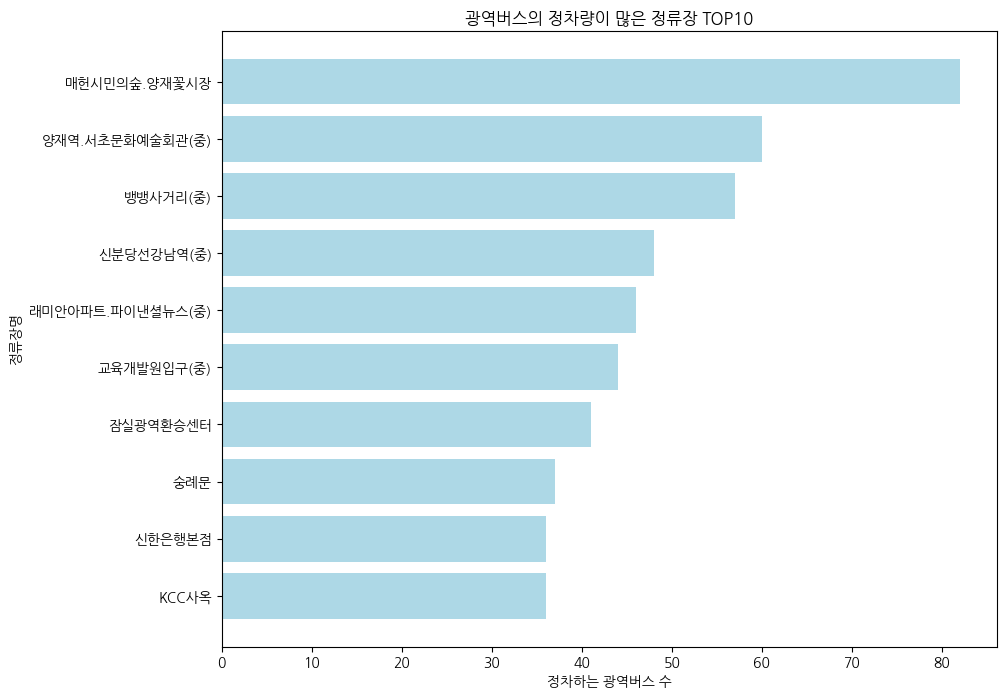

In [ ]:
stop_route_counts_bar_chart_top20 = stop_route_counts_sorted.head(10)

plt.figure(figsize=(10, 8))
plt.barh(stop_route_counts_bar_chart_top20['정류장명'], stop_route_counts_bar_chart_top20['정차하는 버스 수'], color='lightblue')
plt.xlabel('정차하는 광역버스 수')
plt.ylabel('정류장명')
plt.title('광역버스의 정차량이 많은 정류장 TOP10')
plt.gca().invert_yaxis()
plt.show()

####정차 정류장 bar chart 해석
노선이 가장많이 지나가는 정류장 Top10을보니 강남역부근 정류장들을 확인 할 수 있었다.
- (뱅뱅사거리, 신분당선강남역, KCC사옥)

### 혼잡도에 대한 시각화 진행

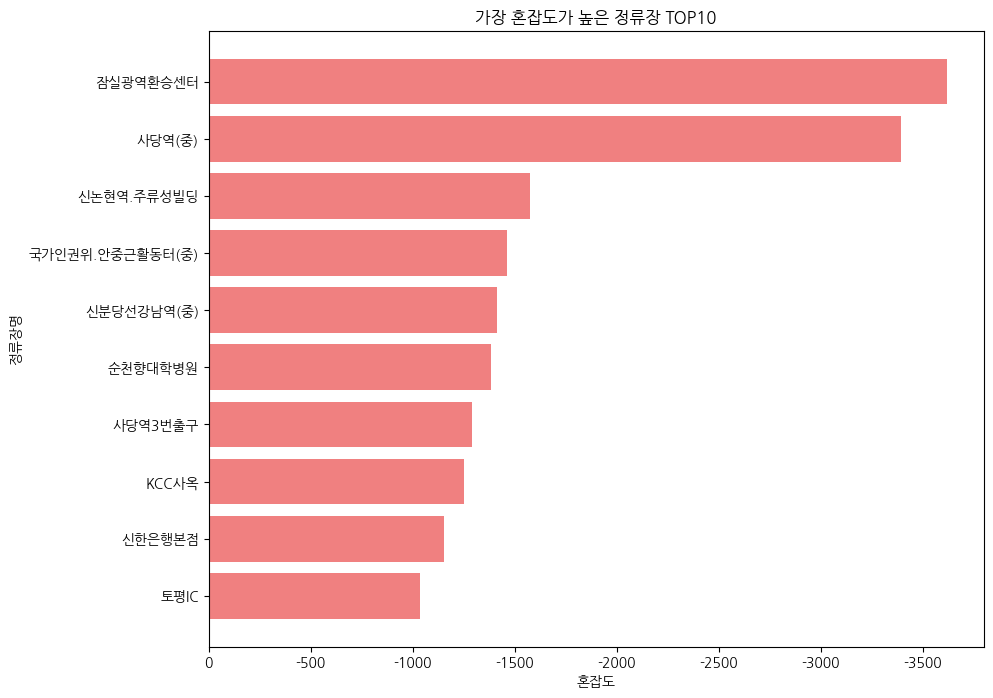

In [ ]:
congestion_bar_chart_top20 = new_congestion5_df.head(10)

plt.figure(figsize=(10, 8))
plt.barh(congestion_bar_chart_top20['정류장명'], congestion_bar_chart_top20['혼잡도 합'], color='lightcoral')
plt.xlabel('혼잡도')
plt.ylabel('정류장명')
plt.title('가장 혼잡도가 높은 정류장 TOP10')
plt.gca().invert_yaxis() # y축 반전
plt.gca().invert_xaxis() # x축 반전
plt.show()

#### 혼잡도 bar chart 해석
- "혼잡도 합"이 높게 나온 상위 10개의 정류장에대한 bar chart를 보았을때 잠실광역환승센터와 사당역이 눈에 띄게 혼잡도가 높은 것을 확인 할 수 있었다.

- 다음으로는 신논현역, 강남역, KCC사옥 등 강남역과 인접한곳의 혼잡도가 상위권에 나오는 것을 볼 수 있었다.






### 혼잡도 지도 시각화

In [ ]:
import folium

In [ ]:
# 강조를 위한 구간별 색 설정
def get_color(value):
    if value < -300:
        return 'red'
    elif -300 <= value < -200:
        return 'orange'
    elif -200 <= value < -100:
        return 'yellow'
    elif -100 <= value < 0:
        return 'lightgreen'
    else:
        return 'green'

In [ ]:
sampling_data = sampling.head(390)

In [ ]:
# 표시되는 지도의 중심을 위, 경도 값의 중간으로 설정
map_center = [sampling_data['위도'].mean(), sampling_data['경도'].mean()]

# 색 강조에 적합한 "cartodbpositron" 형식으로 설정
map_ = folium.Map(location=map_center, tiles='cartodbpositron', zoom_start=12)

In [ ]:
# 주요 역 위,경도 설정
subway = [
    {"이름":"강남역", "위도":"37.497952", "경도":"127.027619",},
    {"이름":"사당역", "위도":"37.476568", "경도":"126.981649"},
    {"이름":"잠실역", "위도":"37.5132612", "경도":"127.1001336"},
    {"이름":"을지로입구역", "위도":"37.566065", "경도":"126.982679"},
    {"이름":"을지로3가역", "위도":"37.566288", "경도":"126.991051"},
    {"이름":"광화문역", "위도":"37.571665", "경도":"126.976502"},
    {"이름":"신논현역", "위도":"37.504724", "경도":"127.02538"},
    {"이름":"한강진역", "위도":"37.539838", "경도":"127.001766"},
    {"이름":"숭례문", "위도":"37.559984", "경도":"126.9753071"}
]

In [ ]:
# 혼잡도 마커
for i, row in sampling_data.iterrows():
    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=abs(row['혼잡도 합']) / 1000 * 10,
        popup=f"{row['정류장명']}: {row['혼잡도 합']}",
        color=get_color(row['혼잡도 합']),
        fill=True,
        fill_color=get_color(row['혼잡도 합']),
        fill_opacity=0.7
    ).add_to(map_)

# 주요 지하철 마커
for station in subway:
    folium.map.Marker(
        location=[station['위도'], station['경도']],
        icon=folium.DivIcon(html=f'''
            <div style="font-size: 10px; font-weight: bold; text-align: center;
                        color: black; background-color: rgba(255, 255, 255, 0);
                        padding: 2px; white-space: nowrap;">
                {station["이름"]}
            </div>''')
    ).add_to(map_)

In [ ]:
map_

# 2. 광역버스의 승객을 다른 대중교통 수단으로 분산시킬 필요가 있는가

# 2-1. 데이터 전처리, 분석, 시각화_4팀_이시현

- 해결 방안: 철도를 이용해 서울로 들어오는 광역버스 수 줄이기
- 우선 광역 버스 수를 줄이기 위해 철도 이용을 증가시키는 것이 적절한 전제인지 분석하였다.


## 전제(철도 이용 증가시키기)가 적절한지에 대한 분석

### 데이터 수집_csv merge해주기
- 정류장,역사에 대한 id값 정보는 연관 데이터인 서울시 지하철역 정보 검색, 서울시 정류장마스터 정보를 merge해 실제 역 이름, 위경도 컬럼을 추가해주었다.  

In [ ]:
kscc_df=pd.read_csv('/content/kscc_dx_trnsf_path_sum_20240829.csv', encoding='cp949')
bus_id_df=pd.read_csv('/content/bus_id.csv',encoding='cp949')
subway_id_df=pd.read_csv('/content/subway_id.csv',encoding='cp949')



# 데이터 유형을 문자열로 변환
kscc_df['하차_정류장/역사_ID'] = kscc_df['하차_정류장/역사_ID'].astype(str)
kscc_df['승차_정류장/역사_ID'] = kscc_df['승차_정류장/역사_ID'].astype(str)

bus_id_df['정류장_ID'] = bus_id_df['정류장_ID'].astype(str)
subway_id_df['전철역코드'] = subway_id_df['전철역코드'].astype(str)

# 버스 ID 병합: 하차_정류장/역사_ID와 승차_정류장/역사_ID를 bus_id.csv의 정류장_ID와 매칭
kscc_df = kscc_df.merge(bus_id_df, how='left', left_on='하차_정류장/역사_ID', right_on='정류장_ID')
kscc_df = kscc_df.merge(bus_id_df, how='left', left_on='승차_정류장/역사_ID', right_on='정류장_ID', suffixes=('_하차', '_승차'))

# 지하철 ID 병합: 하차_정류장/역사_ID와 승차_정류장/역사_ID를 subway_id.csv의 전철역코드와 매칭
kscc_df = kscc_df.merge(subway_id_df, how='left', left_on='하차_정류장/역사_ID', right_on='전철역코드')
kscc_df = kscc_df.merge(subway_id_df, how='left', left_on='승차_정류장/역사_ID', right_on='전철역코드', suffixes=('_지하철_하차', '_지하철_승차'))

# 병합 후 불필요한 컬럼 정리 (존재할 경우에만 삭제)
if '정류장_ID' in kscc_df.columns:
    kscc_df.drop('정류장_ID', axis=1, inplace=True)

if '전철역코드' in kscc_df.columns:
    kscc_df.drop('전철역코드', axis=1, inplace=True)

# 변환된 데이터 저장
kscc_df.to_csv('/content/kscc_dx_trnsf_path_sum_20240829_converted.csv', index=False)

print("Data transformation complete. File saved as 'kscc_dx_trnsf_path_sum_20240829_converted.csv'")

Data transformation complete. File saved as 'kscc_dx_trnsf_path_sum_20240829_converted.csv'


### 1.경기도_지하철 승하차 인원수 출력 & 시각화

#### 경기도 지나는 지하철 역 필터링 해주기

In [ ]:
import pandas as pd

# CSV 파일 로드
df = pd.read_csv('/content/kscc_dx_trnsf_path_sum_20240829_converted.csv', encoding='utf-8')

# 필요한 열 선택
df = df[['시간대', '위도_승차', '경도_승차', '정류장_ID_승차', '전철역코드_지하철_승차']]


In [ ]:
import pandas as pd

# CSV 파일 로드
df = pd.read_csv('/content/kscc_dx_trnsf_path_sum_20240829_converted.csv', encoding='utf-8')

# 경기도에 위치한 지하철 역 목록 (호선별로 확인)
gyeonggi_stations = {
    '1호선': [
        '부천역', '성환역', '수원역', '안양', '명학', '금정', '군포', '당정',
        '의왕', '성균관대', '화서', '세류', '병점', '세마', '오산대', '오산',
        '진위', '송탄', '서정리', '평택지제', '평택', '성환', '직산', '두정'
    ],
    '3호선': [
        '오이도역', '중앙역', '대화', '주엽', '정발산', '마두', '백석', '대곡',
        '화정', '원당', '원흥', '삼송', '지축'
    ],
    '4호선': [
        '진접', '오남', '별내별가람', '선바위', '경마공원', '대공원', '과천',
        '정부과천청사', '인덕원', '평촌', '범계', '금정', '산본', '수리산',
        '대야미', '반월', '상록수', '한대앞', '중앙', '고잔', '초지', '안산',
        '신길온천', '정왕', '오이도'
    ],
    '5호선': [
        '상일동역', '별내역', '미사', '하남풍산', '하남시청', '하남검단산'
    ],
    '7호선': [
        '장암', '청산', '광명사거리', '까치울', '부천종합운동장', '춘의',
        '신중동', '부천시청', '상동', '삼산체육관', '굴포천', '부평구천',
        '산곡', '석남'
    ],
    '8호선': [
        '별내', '다산', '동구릉', '구리', '장자호수공원', '산성',
        '남한산성입구', '단대오거리', '신흥', '수진', '모란'
    ],
    '9호선': [
        '산본역', '평촌역'
    ],
    '신분당선': [
        '광교', '광교중앙', '상현', '성북', '수지구청', '동천', '미금', '정자', '판교'
    ],
    '수인분당선': [
        '가천대', '태평', '모란', '야탑', '이매', '서현', '수내', '정자', '미금',
        '오리', '죽전', '보정', '구성', '신갈', '청명', '영통', '망포', '매탄권선',
        '수원시청', '매교', '수원', '고색', '오목천', '어천', '야목', '사리',
        '한대앞', '중앙', '고잔', '초지', '안산', '신길온천', '정왕', '오이도',
        '달월', '월곶', '소래포구', '인천논현', '호구포', '남동인더스파크',
        '원인재', '연수', '송도', '인하대', '숭의', '신포', '인천'
    ],
    '경원선': [
        '연천', '전곡', '청산', '소요산', '동두천', '보산', '동두천중앙', '지행',
        '덕정', '덕계', '양주', '녹양', '가능', '의정부', '회룡', '망월사', '도봉산'
    ],
    '경부선': [
        '안양', '명학', '금정', '군포', '당정', '의왕', '성균관대', '화서',
        '수원', '세류', '병점', '세마', '오산대', '오산', '진위', '송탄',
        '서정리', '평택지제', '평택', '성환', '직산', '두정'
    ],
    '천안직결선': [
        '두정', '천안'
    ],
    '장항선': [
        '천안', '봉명', '쌍용(나사렛대)', '아산', '탕정', '배방', '온양온천', '신창(순천향대)'
    ],
    '병점기지선': [
        '병점', '서동탄'
    ],
    '시흥연결선': [
        '금천구청', '광명'
    ]
}


# 지하철 호선별 경기도 역 목록 생성
def is_gyeonggi_station(station_name, line):
    return station_name in gyeonggi_stations.get(line, [])

# 경기도 역 여부 확인 함수
def check_gyeonggi(df):
    df['경기도_역_하차'] = df.apply(lambda row: is_gyeonggi_station(row['전철역명_지하철_하차'], row['호선_지하철_하차']), axis=1)
    df['경기도_역_승차'] = df.apply(lambda row: is_gyeonggi_station(row['전철역명_지하철_승차'], row['호선_지하철_승차']), axis=1)
    return df

# 데이터 확인
df = check_gyeonggi(df)

# 경기도에 위치한 역 데이터 확인
gyeonggi_stations_df = df[(df['경기도_역_하차']) | (df['경기도_역_승차'])]

print(gyeonggi_stations_df)

# 경기도 역만 저장
gyeonggi_stations_df.to_csv('gyeonggi_stations_filtered.csv', index=False)


           기준_날짜  하차_정류장/역사_ID  승차_정류장/역사_ID  시간대  환승_수_합  환승_수_합_일반  \
8       20240829     206000532          4311   17       2          2   
489     20240829          1870          1870   16       1          1   
1331    20240829          1855     206000695    0       1          1   
2034    20240829          1858     206000327   14       1          1   
2219    20240829     204000110          1851   15       4          4   
...          ...           ...           ...  ...     ...        ...   
563157  20240829          1853     205000121   19       1          1   
563303  20240829     101000114          1857    6       1          1   
563351  20240829     101000046          1855   13       1          1   
564293  20240829     204000022          1851    5       3          3   
565471  20240829          1854          4314   22       1          1   

        환승_수_합_어린이  환승_수_합_청소년  환승_수_합_경로  환승_수_합_장애인  ...  전철역코드_지하철_하차  \
8                0           0          0           0  ... 

####

In [ ]:

# 지하철 호선별 경기도 역 여부 확인 함수
def is_gyeonggi_station(station_name, line):
    return station_name in gyeonggi_stations.get(line, [])

# 경기도 역 여부 확인 함수
def check_gyeonggi(df):
    df['경기도_역_하차'] = df.apply(lambda row: is_gyeonggi_station(row['전철역명_지하철_하차'], row['호선_지하철_하차']), axis=1)
    df['경기도_역_승차'] = df.apply(lambda row: is_gyeonggi_station(row['전철역명_지하철_승차'], row['호선_지하철_승차']), axis=1)
    return df

# 경기도 역 데이터 필터링
df = check_gyeonggi(df)
gyeonggi_stations_df = df[(df['경기도_역_하차']) | (df['경기도_역_승차'])]

# 시간대별 승차 인원 수 계산
def calculate_total_rides_by_hour(df, hours_column):
    hourly_totals = df.groupby(hours_column)['환승_수_합'].sum().reset_index()
    return hourly_totals

# 시간대별 승차 인원 수 계산
hourly_totals = calculate_total_rides_by_hour(gyeonggi_stations_df, '시간대')

# 결과 출력
print(hourly_totals)

    시간대  환승_수_합
0     0      40
1     1       2
2     4       1
3     5      59
4     6     121
5     7     299
6     8     542
7     9     408
8    10     243
9    11     172
10   12     181
11   13     218
12   14     196
13   15     231
14   16     241
15   17     318
16   18     451
17   19     300
18   20     172
19   21     179
20   22     207
21   23     182


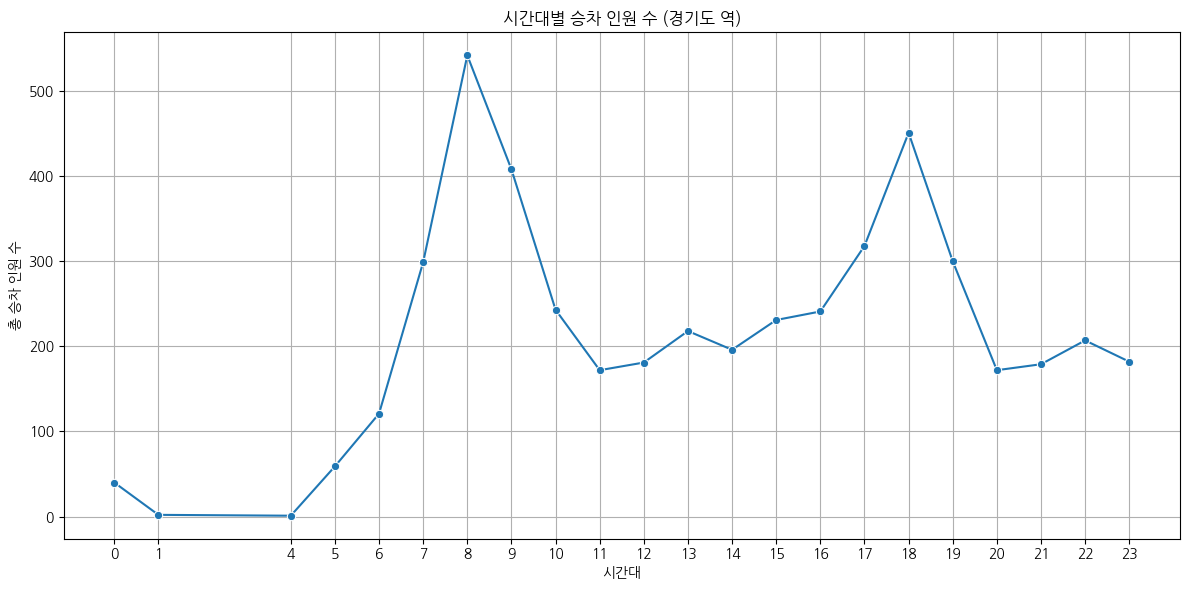

In [ ]:
import seaborn as sns
# 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_totals, x='시간대', y='환승_수_합', marker='o')
plt.title('시간대별 승차 인원 수 (경기도 역)')
plt.xlabel('시간대')
plt.ylabel('총 승차 인원 수')
plt.grid(True)
plt.xticks(hourly_totals['시간대'])
plt.tight_layout()

# 그래프 보여주기
plt.show()

### 2. 경기도 버스 인원수 출력 & 시각화

In [ ]:
# 승차 또는 하차에서 버스를 이용한 데이터 필터링
bus_data = df[(df['전철역코드_지하철_승차'].isna()) | (df['전철역코드_지하철_하차'].isna())]

# 필터링된 데이터를 새로운 CSV 파일로 저장
bus_data.to_csv('bus_only_data.csv', encoding='utf-8-sig', index=False)

print("승차 또는 하차에서 버스를 이용한 데이터가 bus_only_data.csv 파일로 저장되었습니다.")


승차 또는 하차에서 버스를 이용한 데이터가 bus_only_data.csv 파일로 저장되었습니다.


In [ ]:
import pandas as pd

# 두 CSV 파일 불러오기 (적절한 인코딩 사용)
bus_data = pd.read_csv('bus_only_data.csv', encoding='utf-8')
merge1 = pd.read_csv('merge1.csv', encoding='euc-kr')  # 또는 'cp949'

# 승차와 하차가 모두 버스 정류장인 데이터 필터링
bus_data_filtered = bus_data[
    bus_data['정류장_명칭_승차'].isin(merge1['정류장명']) &
    bus_data['정류장_명칭_하차'].isin(merge1['정류장명'])
]

# 승차 정류장을 기준으로 병합
merged_data_승차 = pd.merge(bus_data_filtered, merge1, left_on='정류장_명칭_승차', right_on='정류장명', how='inner')

# 하차 정류장을 기준으로 병합
merged_data_하차 = pd.merge(bus_data_filtered, merge1, left_on='정류장_명칭_하차', right_on='정류장명', how='inner')

# 두 병합 데이터를 합치기 (outer join으로 중복되지 않는 데이터도 포함)
final_merged_data = pd.concat([merged_data_승차, merged_data_하차], ignore_index=True).drop_duplicates()

# 병합된 데이터를 새로운 CSV 파일로 저장
final_merged_data.to_csv('final_merged_bus_data.csv', encoding='utf-8-sig', index=False)



In [ ]:
# '경기도'가 포함된 행 필터링
gyeonggi_data = final_merged_data[final_merged_data['도시명'].str.contains('경기도', na=False)]

# 시간대별 이용 수 집계
time_based_usage = gyeonggi_data.groupby('시간대').size().reset_index(name='이용수')

print(time_based_usage)


    시간대   이용수
0     0   675
1     1    55
2     2    11
3     3    10
4     4   466
5     5  1383
6     6  1856
7     7  2707
8     8  3489
9     9  3197
10   10  3008
11   11  2842
12   12  3095
13   13  3067
14   14  3371
15   15  3597
16   16  3927
17   17  3940
18   18  4343
19   19  3469
20   20  2665
21   21  2678
22   22  2788
23   23  1856


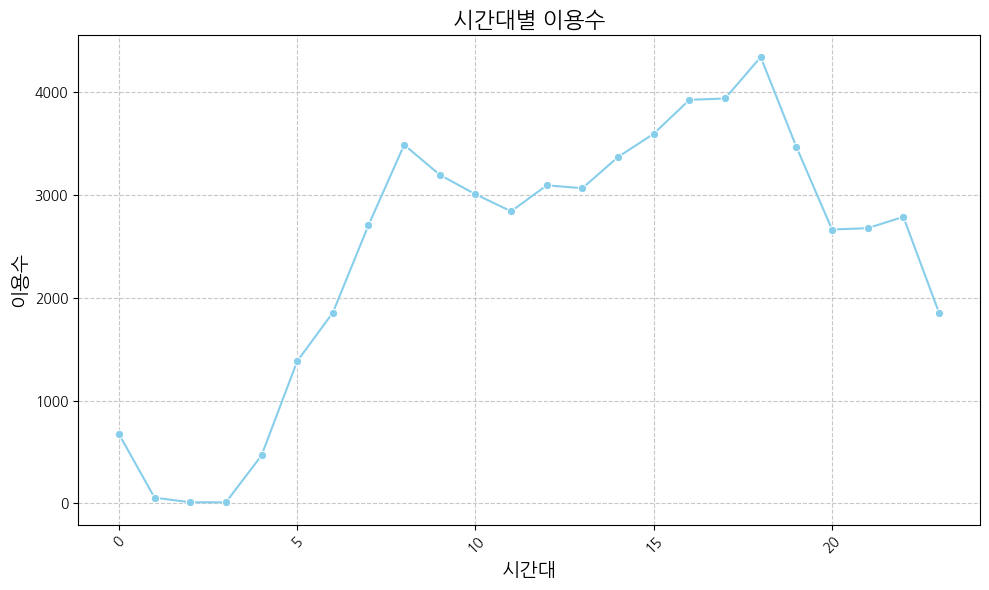

In [ ]:
import seaborn as sns

# 시간대별 이용 수 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(data=time_based_usage, x='시간대', y='이용수', marker='o', color='skyblue')
plt.xlabel('시간대', fontsize=14)
plt.ylabel('이용수', fontsize=14)
plt.title('시간대별 이용수', fontsize=16)
plt.xticks(rotation=45)  # 시간대가 겹치지 않도록 회전
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()  # 그래프가 잘리거나 겹치지 않도록 자동 조정
plt.show()


### 3. 경기도에서의 승하차 인원에 대해 버스 - 지하철 인원 비교

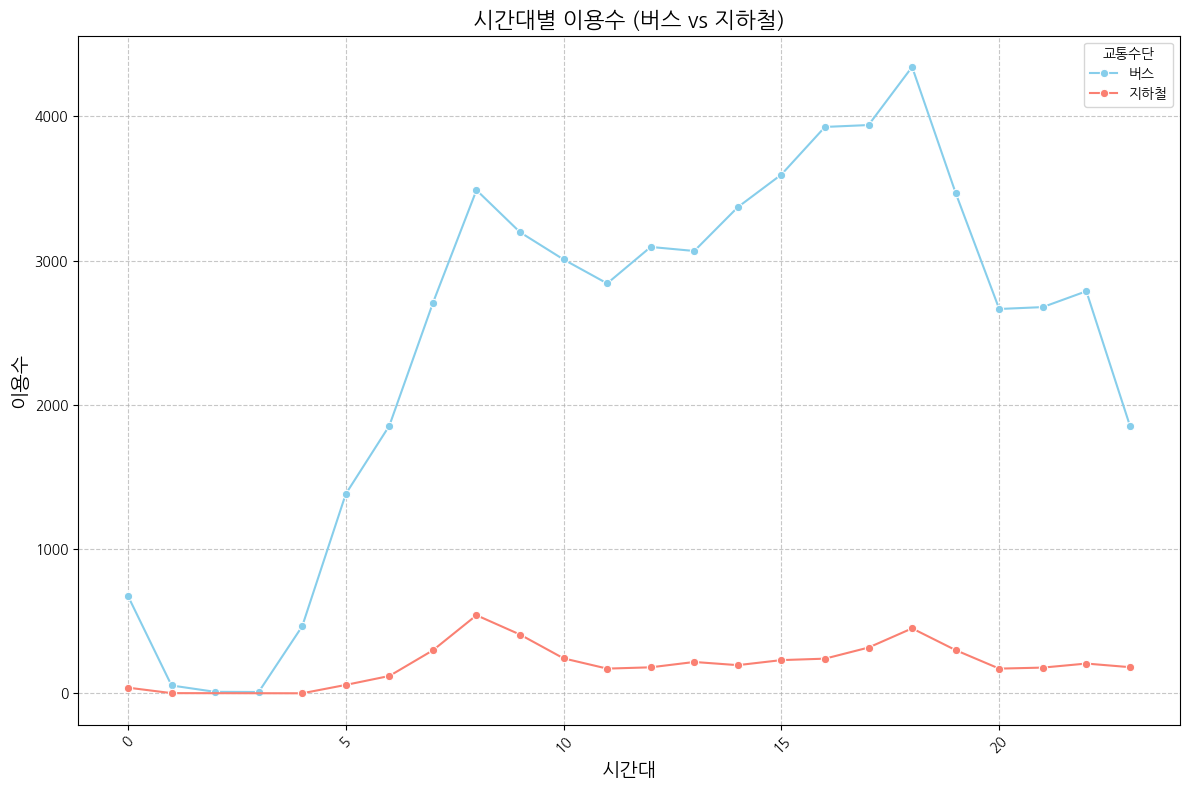

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 버스와 지하철 데이터 준비
# 예시 데이터 프레임: time_based_usage_bus, time_based_usage_subway

plt.figure(figsize=(12, 8))

# 버스 시간대별 이용 수 선 그래프
sns.lineplot(data=time_based_usage, x='시간대', y='이용수', marker='o', label='버스', color='skyblue')

# 지하철 시간대별 이용 수 선 그래프
sns.lineplot(data=hourly_totals, x='시간대', y='환승_수_합', marker='o', label='지하철', color='salmon')

plt.xlabel('시간대', fontsize=14)
plt.ylabel('이용수', fontsize=14)
plt.title('시간대별 이용수 (버스 vs 지하철)', fontsize=16)
plt.xticks(rotation=45)  # 시간대가 겹치지 않도록 회전
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='교통수단')
plt.tight_layout()  # 그래프가 잘리거나 겹치지 않도록 자동 조정
plt.show()


실제 경기도 위치한 역, 정류장을 조사했을때 이용률이 버스가 월등히 높은것을 확인할 수 있었다.

따라서 **광역버스의 수를 줄이기 위해 지하철 이용을 증가시키는 방안이 적절**하다는 결론을 내릴 수 있었다.

## 지하철 환승에 대한 인센티브 부여 방식
- 버스 이용객을 지하철로 유도하기 위한 방안으로 인센티브 제공 방식 고안. 이를 위해 광역버스 이용 패턴 분석

### 1. 이용객들이 많이 이용하는 날짜에 대한 지하철 인센티브 부여 검토

In [ ]:
df=pd.read_csv('/content/pattern.csv',encoding='cp949')

경기버스 이용률: 4.70%
주중 전체 이용:  6149996947
주말 전체 이용:  1643164030
주중:  296938500
주말:  69519181
주중 경기버스 이용률: 4.83%
주말 경기버스 이용률: 4.23%


Text(0.5, 1.0, '경기버스 이용률 (주중, 주말)')

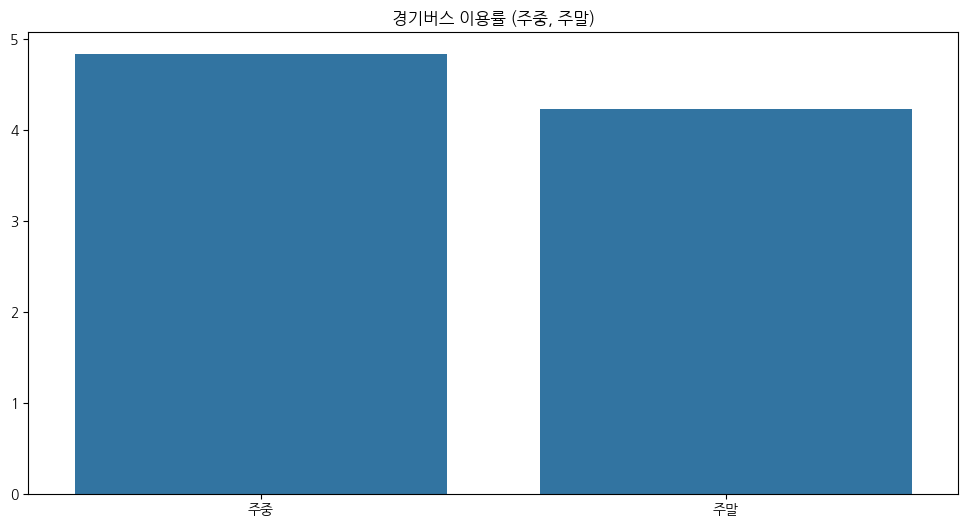

In [ ]:
import pandas as pd


# 기준_날짜 칼럼을 날짜 형식으로 변환
df['기준_날짜'] = pd.to_datetime(df['기준_날짜'])

# 요일 정보 추가
df['요일'] = df['기준_날짜'].dt.day_name()

# 주말인지 주중인지 판단하여 새로운 칼럼에 저장
df['주말_주중'] = df['요일'].apply(lambda x: '주말' if x in ['Saturday', 'Sunday'] else '주중')

# 경기버스 패턴만 필터링
df_kyonggi_bus = df[df['목적통행_패턴'].str.contains('경기버스')].copy()

# 전체 승객 수 집계
total_passengers = df['총_승객수'].sum()

# 경기버스 승객 수 집계
kyonggi_bus_passengers = df_kyonggi_bus['총_승객수'].sum()

# 경기버스 이용률 계산
kyonggi_bus_usage_rate = (kyonggi_bus_passengers / total_passengers) * 100

print(f'경기버스 이용률: {kyonggi_bus_usage_rate:.2f}%')

# 주중과 주말 데이터 필터링
df_kyonggi_bus_weekday = df_kyonggi_bus[df_kyonggi_bus['주말_주중'] == '주중']
df_kyonggi_bus_weekend = df_kyonggi_bus[df_kyonggi_bus['주말_주중'] == '주말']

# 주중과 주말의 전체 승객 수 집계
total_passengers_weekday = df[df['주말_주중'] == '주중']['총_승객수'].sum()
print("주중 전체 이용: ",total_passengers_weekday)
total_passengers_weekend = df[df['주말_주중'] == '주말']['총_승객수'].sum()
print("주말 전체 이용: ",total_passengers_weekend)

# 경기버스 승객 수 집계 (주중과 주말)
kyonggi_bus_passengers_weekday = df_kyonggi_bus_weekday['총_승객수'].sum()
print("주중: ",kyonggi_bus_passengers_weekday)
kyonggi_bus_passengers_weekend = df_kyonggi_bus_weekend['총_승객수'].sum()
print("주말: ",kyonggi_bus_passengers_weekend)

# 주중과 주말의 경기버스 이용률 계산
kyonggi_bus_usage_rate_weekday = (kyonggi_bus_passengers_weekday / total_passengers_weekday) * 100
kyonggi_bus_usage_rate_weekend = (kyonggi_bus_passengers_weekend / total_passengers_weekend) * 100

print(f'주중 경기버스 이용률: {kyonggi_bus_usage_rate_weekday:.2f}%')
print(f'주말 경기버스 이용률: {kyonggi_bus_usage_rate_weekend:.2f}%')

plt.figure(figsize=(12, 6))
sns.barplot(x=['주중', '주말'], y=[kyonggi_bus_usage_rate_weekday, kyonggi_bus_usage_rate_weekend])
plt.title('경기버스 이용률 (주중, 주말)')

Monday 경기버스 이용률: 4.83%
Tuesday 경기버스 이용률: 4.85%
Wednesday 경기버스 이용률: 4.82%
Thursday 경기버스 이용률: 4.85%
Friday 경기버스 이용률: 4.79%


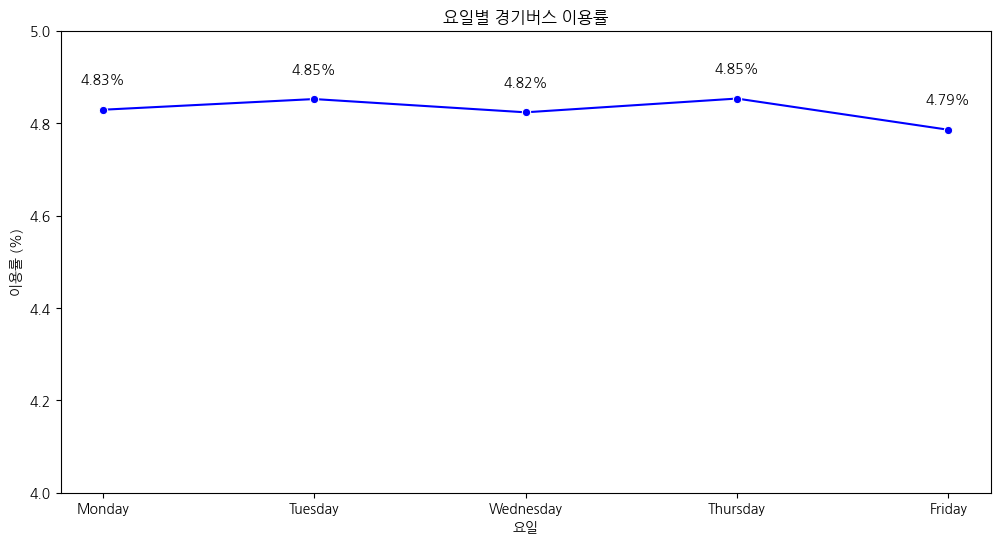

In [ ]:

import pandas as pd

# 데이터 로드
# df = pd.read_csv('pattern.csv')

# 기준_날짜 칼럼을 날짜 형식으로 변환
df['기준_날짜'] = pd.to_datetime(df['기준_날짜'])

# 요일 정보 추가
df['요일'] = df['기준_날짜'].dt.day_name()

# 주말인지 주중인지 판단하여 새로운 칼럼에 저장
df['주말_주중'] = df['요일'].apply(lambda x: '주말' if x in ['Saturday', 'Sunday'] else '주중')

# 경기버스 패턴만 필터링
df_kyonggi_bus = df[df['목적통행_패턴'].str.contains('경기버스')].copy()

# 요일별 경기버스 이용률 계산
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
usage_rates_by_day = {}

for day in weekdays:
    # 해당 요일의 전체 승객 수와 경기버스 승객 수 집계
    total_passengers_day = df[df['요일'] == day]['총_승객수'].sum()
    kyonggi_bus_passengers_day = df_kyonggi_bus[df_kyonggi_bus['요일'] == day]['총_승객수'].sum()

    # 이용률 계산
    if total_passengers_day > 0:  # 0으로 나누는 것을 방지
        usage_rate = (kyonggi_bus_passengers_day / total_passengers_day) * 100
    else:
        usage_rate = 0

    # 요일별 이용률 저장
    usage_rates_by_day[day] = usage_rate

# 요일별 경기버스 이용률 출력
for day, rate in usage_rates_by_day.items():
    print(f'{day} 경기버스 이용률: {rate:.2f}%')
plt.figure(figsize=(12, 6))
lineplot = sns.lineplot(x=list(usage_rates_by_day.keys()), y=list(usage_rates_by_day.values()), marker='o', color='b')

# y축 범위를 3에서 5 사이로 제한
plt.ylim(3, 5)

# 각 포인트 위에 수치 표시하기
for i, rate in enumerate(usage_rates_by_day.values()):
    plt.text(i, rate + 0.05, f'{rate:.2f}%', ha='center', va='bottom')
plt.ylim(4, 5)
plt.title('요일별 경기버스 이용률')
plt.ylabel('이용률 (%)')
plt.xlabel('요일')
plt.show()

#### 결과
분석 결과, 주중이 주말에 비해 이용률이 높지만, 큰 차이는 나타나지 않았다. 또한, 주중 요일별로도 큰 차이가 없어, 특정 날짜에 대한 인센티브 제공이 큰 효과를 보지 못할 것이라고 판단하였다. 이에 따라 날짜에 대한 인센티브 제공은 배제하기로 결정하였다.

### 일반 비율에 대해서도 할인 확대
- 현재 청소년은 기본 요금의 30%, 어린이는 50% 할인을 받고 있지만, 일반 승객은 할인 혜택이 없는 상태이다.

In [ ]:
# 경기버스 패턴만 필터링하고 명시적 복사본 생성
df_kyonggi_bus = df[df['목적통행_패턴'].str.contains('경기버스')].copy()

# 승객 수 계산
df_kyonggi_bus['총_승객수_총합'] = df_kyonggi_bus[['총_승객수_일반', '총_승객수_어린이', '총_승객수_청소년', '총_승객수_경로', '총_승객수_장애인']].sum(axis=1)

# 각 승객층 비율 계산
df_kyonggi_bus.loc[:, '비율_일반'] = df_kyonggi_bus['총_승객수_일반'] / df_kyonggi_bus['총_승객수_총합']
df_kyonggi_bus.loc[:, '비율_어린이'] = df_kyonggi_bus['총_승객수_어린이'] / df_kyonggi_bus['총_승객수_총합']
df_kyonggi_bus.loc[:, '비율_청소년'] = df_kyonggi_bus['총_승객수_청소년'] / df_kyonggi_bus['총_승객수_총합']
df_kyonggi_bus.loc[:, '비율_경로'] = df_kyonggi_bus['총_승객수_경로'] / df_kyonggi_bus['총_승객수_총합']
df_kyonggi_bus.loc[:, '비율_장애인'] = df_kyonggi_bus['총_승객수_장애인'] / df_kyonggi_bus['총_승객수_총합']

# 승객층 비율 평균
average_ratios = df_kyonggi_bus[['비율_일반', '비율_어린이', '비율_청소년', '비율_경로', '비율_장애인']].mean()
print(average_ratios)


비율_일반     0.934438
비율_어린이    0.041933
비율_청소년    0.077119
비율_경로     0.081961
비율_장애인    0.028607
dtype: float64


<ipython-input-21-5bba62cdbfe7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_ratios.index, y=average_ratios.values, palette='viridis')


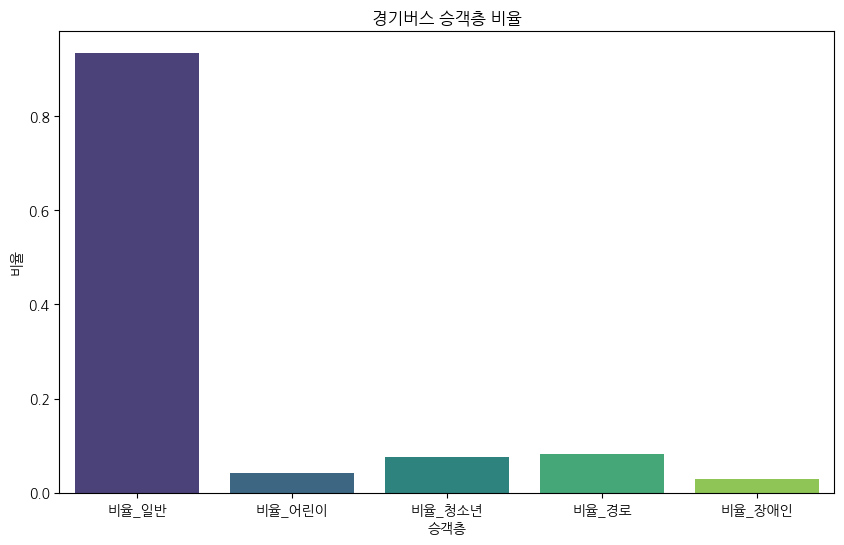

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (필요 시)
plt.rcParams['font.family'] = 'NanumGothic'  # 또는 'AppleGothic', 'Malgun Gothic' 등
plt.rcParams['axes.unicode_minus'] = False

# 비율 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=average_ratios.index, y=average_ratios.values, palette='viridis')

plt.title('경기버스 승객층 비율')
plt.xlabel('승객층')
plt.ylabel('비율')
plt.show()


#### 결과
-  일반 승객의 비율이 93%로 대부분을 차지하고 있었다
- 경기버스 이용객의 대부분이 요금 할인을 받지 못하고 있음
- 도로가 가장 혼잡한 출퇴근 시간에 대한 지하철 요금 할인 제안.


# 2-2. 데이터 전처리, 분석, 시각화_4팀_정재창
##노선 및 버스 선호도 파악

##노선별 혼잡도 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

! pip install koreanize-matplotlib
import matplotlib.pyplot as plt
import koreanize_matplotlib

df=pd.read_csv('/content/drive/MyDrive/코드잇/4팀 초급 프로젝트/데이터/노선 정류장 지표(노선별 혼잡도).csv', encoding='cp949')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 25.0 MB/s eta 0:00:00


In [ ]:
#의미 없는 칼럼 삭제
df.drop('Unnamed: 28',axis=1,inplace=True)

##노선별로 그룹화한 모든 데이터를 시각화


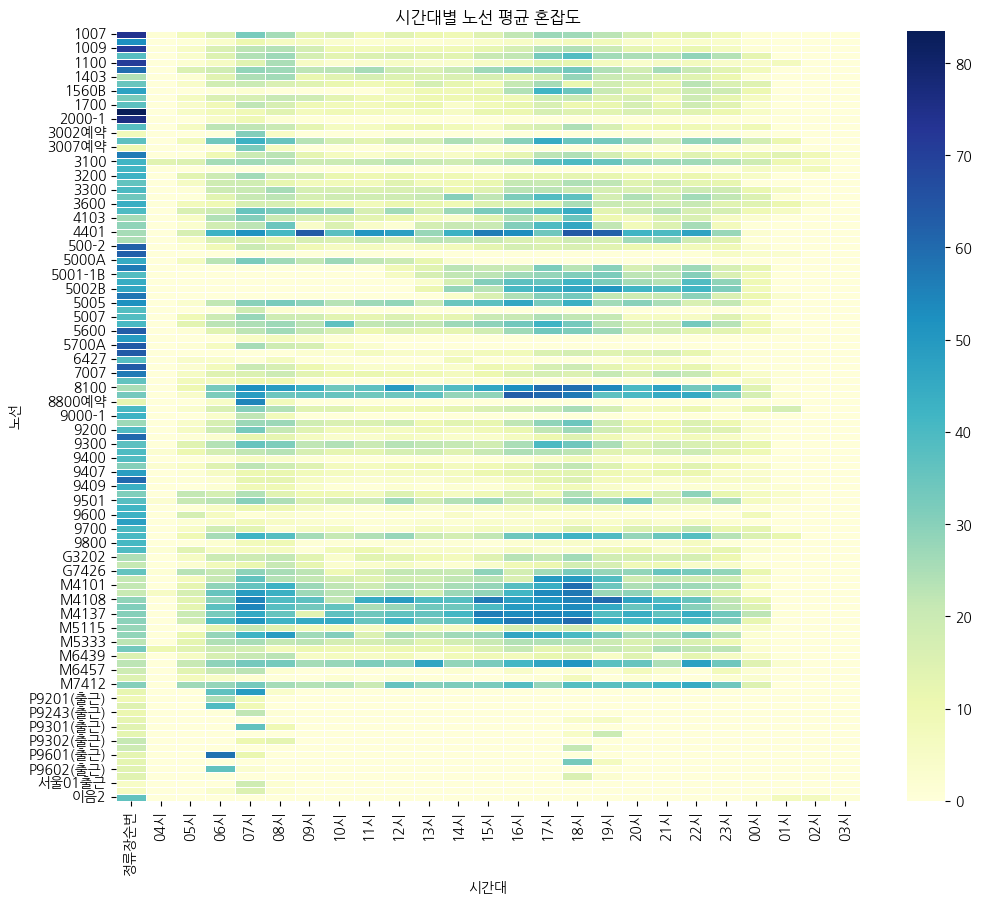

In [ ]:
grouped_data = df.groupby('노선').mean(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(grouped_data, cmap="YlGnBu", annot=False, linewidths=.5)
plt.title('시간대별 노선 평균 혼잡도')
plt.xlabel('시간대')
plt.ylabel('노선')
plt.show()

진할수록 혼잡하고 연할수록 널널한 노선이다.

혼잡한 시간대는 출근시간대 06시08시, 퇴근 시간대는 17시18시가 가장 혼잡하다

여유로운 시간대는 새벽은 제외하면 10시 혹은 13시가 제일 여유롭다.

해당 시간대들로 시각화를 해보자

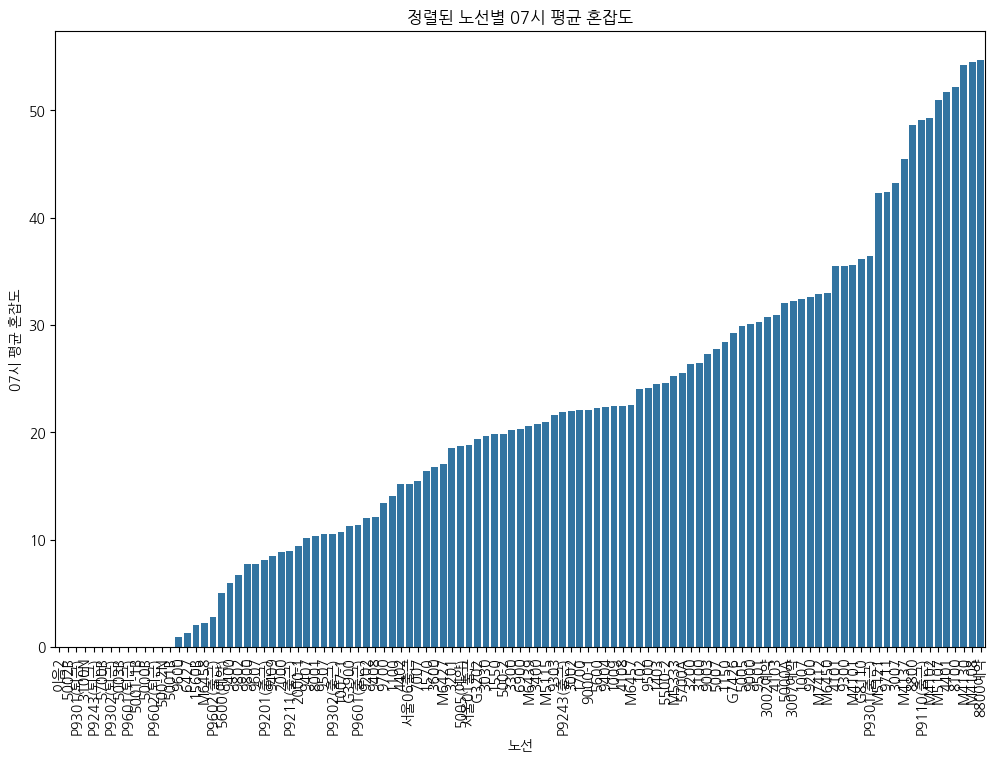

In [ ]:
# '07시' 평균 혼잡도를 오름차순으로 정렬
sorted_data = grouped_data['07시'].sort_values()

# 막대 그래프 그리기
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_data.index, y=sorted_data.values)
plt.title('정렬된 노선별 07시 평균 혼잡도')
plt.xlabel('노선')
plt.ylabel('07시 평균 혼잡도')
plt.xticks(rotation=90)
plt.show()

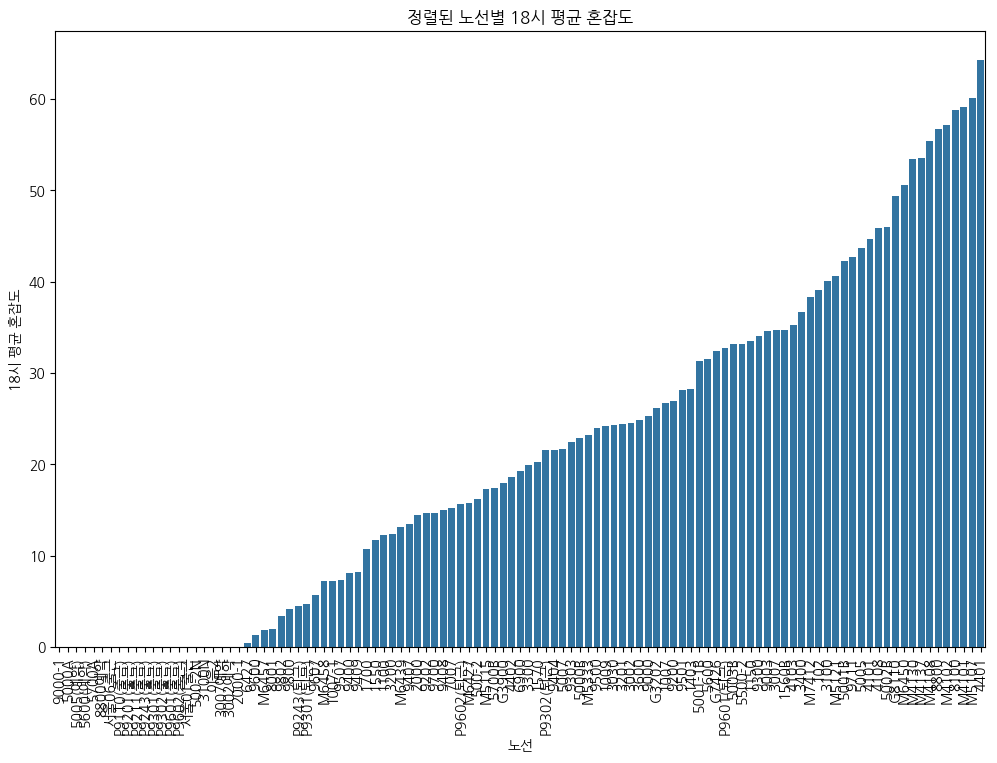

In [ ]:
# '18시' 평균 혼잡도를 오름차순으로 정렬
sorted_data = grouped_data['18시'].sort_values()

# 막대 그래프 그리기
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_data.index, y=sorted_data.values)
plt.title('정렬된 노선별 18시 평균 혼잡도')
plt.xlabel('노선')
plt.ylabel('18시 평균 혼잡도')
plt.xticks(rotation=90)
plt.show()

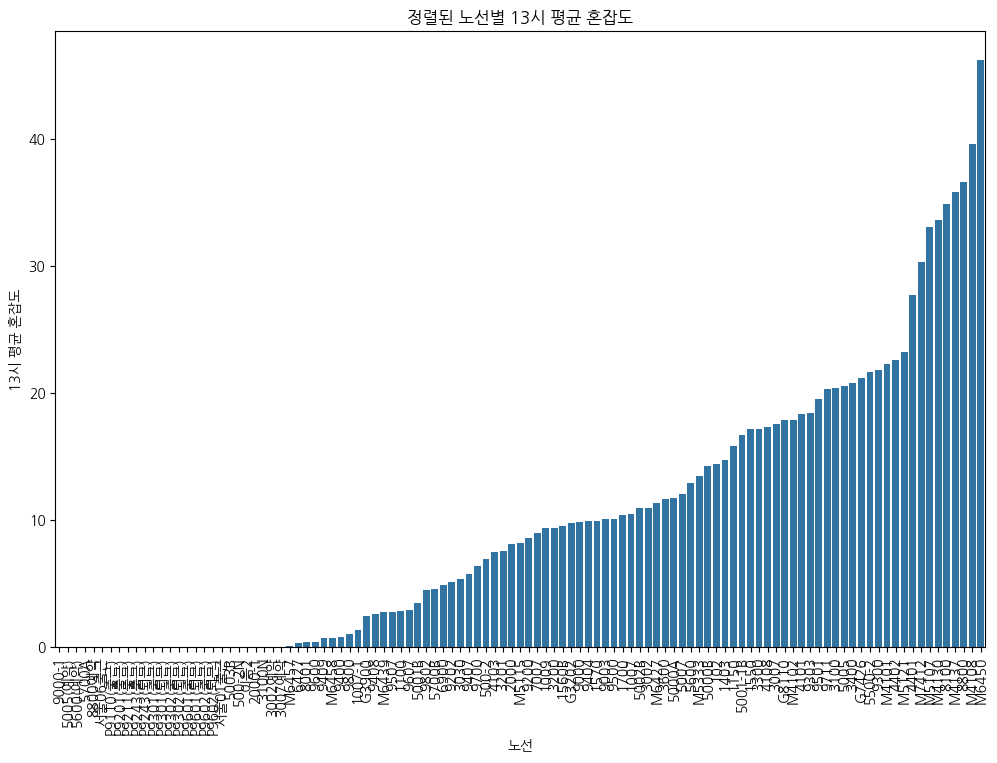

In [ ]:
# '13시' 평균 혼잡도를 오름차순으로 정렬
sorted_data = grouped_data['13시'].sort_values()

# 막대 그래프 그리기
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_data.index, y=sorted_data.values)
plt.title('정렬된 노선별 13시 평균 혼잡도')
plt.xlabel('노선')
plt.ylabel('13시 평균 혼잡도')
plt.xticks(rotation=90)
plt.show()

대부분 혼잡하지 않고 여유로운데

소수의 광역버스들은 계속 혼잡함을 유지하고 있다.

대중교통을 이용하는 고객의 입장이라면

"아 여유로운 버스 많고 좋네~"

라 생각할 수 있지만

비효율적인 버스가 많다는 걸 의미하기도 한다.

In [ ]:
grouped_data['19시'].mean()
#광역버스 혼잡도 분포를 보니까
#높은 애들도 많은데 낮은 애들이 너무 많다


15.98171487763145

In [ ]:
grouped_data['18시'].sort_values(ascending=False).head(15)

,18시
노선,
4401,64.230769
M5107,60.133333
M4101,59.113636
8100,58.784314
M4102,57.166667
8800,56.761194
M4108,55.355932
M4137,53.532258
M4130,53.460317


##특히 최상위 버스 노선의 이름은 'Mxxxx'로 이루어져 있다.

찾아보니 M시리즈는 광역급행버스로

광역급행 버스란?
광역버스의 정류장을 더욱 줄여서 평균 15분 더 빠른 노선이다.

In [ ]:
grouped_data['18시'].sort_values().head(15)

,18시
노선,
9000-1,0.0
5000A,0.0
5005(예약),0.0
5600(예약),0.0
5700A,0.0
8800예약,0.0
서울06출근,0.0
P9110(출근),0.0
P9201(출근),0.0


#반대로 항상 하위권 노선 'Pxxxx'는 경기 프리미엄 버스이다.

---



#경기 프리미엄 버스란?
높은 혼잡도와 긴 대기시간, 잦은 환승을 줄이기 위해 만든 버스
 미리 예약을 해야 이용할 수 있는 예약제로 운영된다.

애초에 혼잡도를 낮추기 위해 기획되어 있는 노선이라 항상 혼잡도가 낮게 나온 것이다.

#EDA 결론
광역버스 혼잡도는 빈익빈 부익부,

##대부분 여유롭지만(경우에 따라 비효율적) 소수의 노선(광역급행버스)에 사람이 몰린다.




*   몰리는 이유: 다른 노선에 비해 15분 더 빨리 감
*   사람들이 버스를 선택하는 기준: 속도, 특히 퇴근시간대라 불편해도 더 많이 몰리는 것 같다.





먼거리임에도 지하철 대신 광역버스를 택했다는 것은
속도의 이점
적은 환승

그렇다면 광역버스보다 광역급행버스가 선호되는 이유와 일치

#사람들은 좀 혼잡하고 불편하더라도 일단 빨리 가는 걸 더 선호한다.

그렇다면 광역버스 이용객을 지하철 이용을 독려할 때
소액의 인센티브를 주는 것이 효과가 있을까?